# Mobile Price Classification 

### Table of contenet:
<li><a href='#intro'>Introduction</a></li>
<li><a href='#wrang'>Data Wranglling</a></li>
<li><a href='#fea'>Feature Engineering</a></li>
<li><a href='#eda'>Exploratory Data Analysis</a></li>
<li><a href='#ml'>Machine Learning Process</a></li>
<li><a href='#conc'>Conclusion</a></li>

<a id='intro'></a>
## Introduction

* **Context**
<p>Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is. </p>
you can find the dataset [here](https://www.kaggle.com/iabhishekofficial/mobile-price-classification).
* **Project Goal**
<p>Predict a price range indicating how high the price is</p>
* **Attributes Defintion**
<li>battery_power: Total energy a battery can store in one time measured in mAh</li>
Hint: Capacity loss: the faster the charging speed, the greater the capacity loss.
<li>blue: Has bluetooth or not</li>
<li>clock_speed: speed at which microprocessor executes instructionst</li>
<li>dual_sim: Has dual sim support or not</li>
<li>fc: Front Camera mega pixels</li>
<li>four_g: Has 4G or not</li>
<li>int_memory: Internal Memory in Gigabytes</li>
<li>m_dep: Mobile Depth in cm</li>
<li>mobile_wt: Weight of mobile phone</li>
<li>n_cores: Number of cores of processor</li>
<li>pc: Primary Camera mega pixels</li>
<li>px_height: Pixel Resolution Height</li>
<li>px_width: Pixel Resolution Width</li>
<li>ram: Random Access Memory in Megabytes</li>
<li>sc_h: Screen Height of mobile in cm</li>
<li>sc_w: Screen Width of mobile in cm</li>
<li>talk_time: longest time that a single battery charge will last when you are</li>
<li>three_g: Has 3G or not</li>
<li>touch_screen: Has touch screen or not</li>
<li>wifi: Has wifi or not</li>
<li>price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).</li>


#### Imports

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':[7,8]},font_scale=1.2)
sns.set_theme(palette='rocket')
from datasist.structdata import detect_outliers

# stats models
import phik
from phik.report import plot_correlation_matrix

<a id='wrang'></a>
## Data Wrangling
Data Wranglling contains some processes which we will follow it
<ul>
<li><a href='#disc'>Data Discovery</a></li>
<li><a href='#clean'>Data Cleaning</a></li>
<li><a href='#enrich'>Data Enriching</a></li>
<li><a href='#valid'>Data Validating</a></li>
<li><a href='#publi'>Data Publishing</a></li>
    </ul>


<a id='clean'></a>Data Cleaning
<a id='enrich'></a>Data Enriching
<a id='valid'></a>Data Validating
<a id='publi'></a>Data Publishing

<a id='disc'></a><li>Data Discovery</li>
* Loading dataset and explore the data

In [2]:
def load_data(path):
    df = pd.read_csv(path)
    df.name = path.split("/")[-1].split(".")[0]
    print(f'{df.name} loaded successfuly')
    return df

In [3]:
df = load_data("datasets/train.csv")

train loaded successfuly


In [4]:
def explore_data(df,num_rows=5):
    pd.set_option('display.max_columns',df.shape[1])
    try:
        df_name = df.name
    except:
        df_name = 'new_df'
    finally:
        print(f'{df_name} contains {df.shape[0]} rows & {df.shape[1]} columns')
        print(f'Top {num_rows} rows:')
        display(df.head(num_rows))
        print(f'Last {num_rows} rows:')
        display(df.tail(num_rows))

In [5]:
explore_data(df,num_rows=5)

train contains 2000 rows & 21 columns
Top 5 rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


Last 5 rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


* check missing values & Data types

In [6]:
df.name = 'mobile_dataset'

In [7]:
def check_data(df):
    try:
        name = df.name
    except:
        name ="new_df"
    finally:
        dt_df = pd.DataFrame()
        dt_df['features'] = df.columns
        dt_df['first_val'] = pd.Series([df[col][0] for col in df.columns])
        dt_df['nunique'] = pd.Series([df[col].nunique() for col in df.columns])
        dt_df.set_index('features',inplace=True)
        dt_df['dtype'] = df.dtypes
        dt_df['cnt_missing'] = df.isna().sum()
        dt_df['missing_%'] = df.isna().sum() / df.shape[0]*100
        print(f'{name} datatypes & missing values information')
        display(dt_df)

In [8]:
check_data(df)

mobile_dataset datatypes & missing values information


,first_val,nunique,dtype,cnt_missing,missing_%
features,,,,,
battery_power,842.0,1094,int64,0,0.0
blue,0.0,2,int64,0,0.0
clock_speed,2.2,26,float64,0,0.0
dual_sim,0.0,2,int64,0,0.0
fc,1.0,20,int64,0,0.0
four_g,0.0,2,int64,0,0.0
int_memory,7.0,63,int64,0,0.0
m_dep,0.6,10,float64,0,0.0
mobile_wt,188.0,121,int64,0,0.0


* check duplicated values

In [9]:
def check_data(df):
    try:
        name = df.name
    except:
        name ="new_df"
    finally:
        print(f'{name} has {df.duplicated().sum()} duplicated values')
        if df.duplicated().sum() >0:
            print(f'Keep Last occurance:')
            display(df[df.duplicated()])
            print(f'Keep First occurance:')
            display(df[df.duplicated()])

In [10]:
check_data(df)

mobile_dataset has 0 duplicated values


* Describtive statistics
    * Quantitative describtive statistics

In [11]:
df['wifi'].dtypes

dtype('int64')

In [12]:
def quantitative_describtive_stats(df):
    try:
        name = df.name
    except:
        name ="new_df"
    finally:
        stats_df = df.describe()
        stats_df.loc['range'] = stats_df.loc['max']-stats_df.loc['min']
        stats_df.loc['iqr'] = stats_df.loc['75%']-stats_df.loc['25%']
        stats_df.loc['min_whisker'] = stats_df.loc['25%'] - 1.5* stats_df.loc['iqr']
        stats_df.loc['max_whisker'] = stats_df.loc['75%'] + 1.5* stats_df.loc['iqr']
        display(f'{name} datset Describitive statistics for quantitative variables',stats_df)
        cont_var=[]
        for col in df.select_dtypes(include=['number']).columns:
            if df[col].nunique() >4:
                cont_var.append(col)
        fig,axs = plt.subplots(4,4,figsize=(30,15))
        fig.subplots_adjust(hspace=0.5, wspace=0.2)
        axs = axs.ravel()
        for i,col in enumerate(df[cont_var].columns):
            sns.boxplot(data=df[cont_var],x=col,ax=axs[i])

'mobile_dataset datset Describitive statistics for quantitative variables'

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000
range,1497.000000,1.0000,2.500000,1.000000,19.000000,1.000000,62.000000,0.900000,120.000000,7.000000,20.000000,1960.000000,1498.000000,3742.000000,14.000000,18.000000,18.000000,1.000000,1.000000,1.000000,3.000000
iqr,763.500000,1.0000,1.500000,1.000000,6.000000,1.000000,32.000000,0.600000,61.000000,4.000000,10.000000,664.500000,758.250000,1857.000000,7.000000,7.000000,10.000000,0.000000,1.000000,1.000000,1.500000


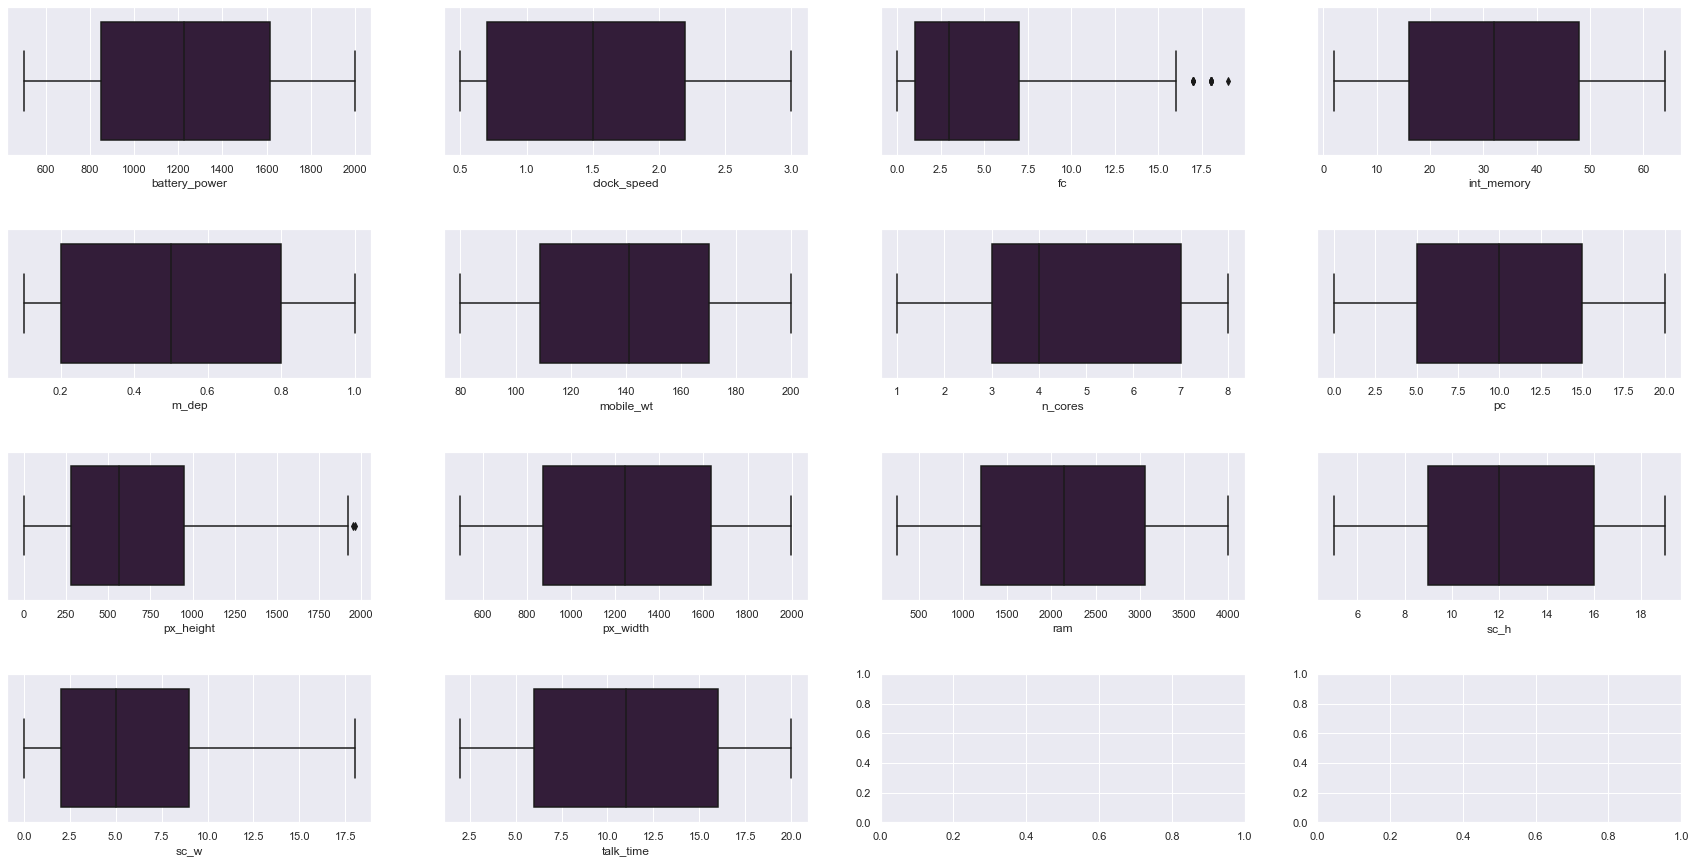

In [13]:
quantitative_describtive_stats(df)

In [14]:
def qualitative_describtive_stats(df):
    try:
        name = df.name
    except:
        name ="new_df"
    finally:
        print(f'{name} datset Describitive statistics for Qualitative variables')
        for col in df.columns:
            if df[col].nunique() <=10:
                sns.countplot(data=df,x=col)
                plt.show()
                display(pd.DataFrame(df[col].value_counts()).T)

mobile_dataset datset Describitive statistics for Qualitative variables


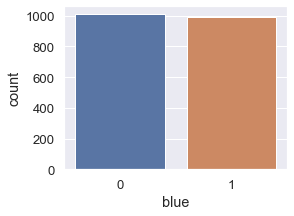

,0,1
blue,1010,990


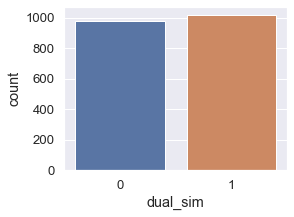

,1,0
dual_sim,1019,981


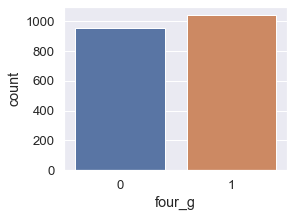

,1,0
four_g,1043,957


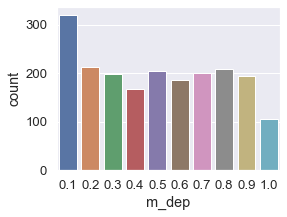

,0.1,0.2,0.8,0.5,0.7,0.3,0.9,0.6,0.4,1.0
m_dep,320,213,208,205,200,199,195,186,168,106


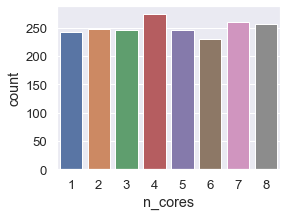

,4,7,8,2,3,5,1,6
n_cores,274,259,256,247,246,246,242,230


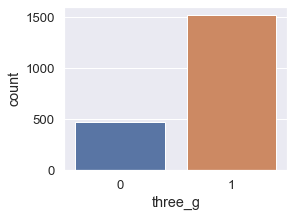

,1,0
three_g,1523,477


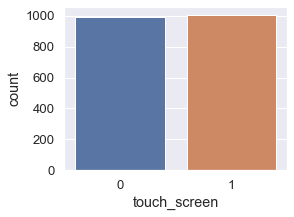

,1,0
touch_screen,1006,994


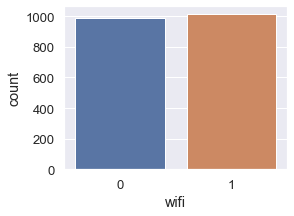

,1,0
wifi,1014,986


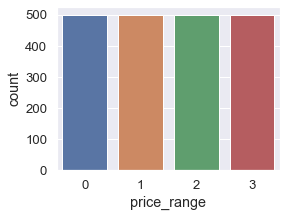

,1,2,3,0
price_range,500,500,500,500


In [15]:
sns.set(rc={'figure.figsize':[4,3]},font_scale=1.2)
qualitative_describtive_stats(df)

<li><a id='clean'></a>Data Cleaning</li>
from above we find that:
<ol>
    <li>Data has no missing values.</li>
    <li>Data has valid data types.</li>
    <li>Data has no duplicates.</li>
    <li>Only fc & px_height have outliers will check them.</li>
    </ol>

In [16]:
idx_outliers = detect_outliers(df,0,df[['fc','px_height']])
df.loc[idx_outliers]

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
95,1137,1,1.0,0,18,0,7,1.0,196,3,19,942,1179,3616,13,5,12,1,1,1,3
169,1569,0,2.8,1,17,0,44,0.3,110,4,20,45,1942,1260,9,2,17,1,0,0,1
226,1708,1,2.4,1,18,1,49,0.1,109,1,19,233,517,3388,6,4,16,1,1,1,3
229,1689,0,1.8,0,17,0,24,0.3,127,3,18,954,1200,2766,7,2,7,0,1,1,3
300,1937,1,1.7,0,17,0,58,0.6,189,1,19,1728,1767,3321,5,4,14,1,1,0,3
305,1348,0,2.0,0,18,0,52,0.3,98,3,20,1869,1942,955,18,11,7,1,1,1,1
372,1703,1,1.5,1,17,1,55,0.7,138,5,19,1411,1711,2993,5,1,20,1,1,1,3
584,946,1,2.6,1,17,0,5,0.1,166,3,20,1698,1771,3720,15,7,4,0,1,0,3
1387,1533,1,1.1,1,18,1,17,0.3,160,4,20,1054,1393,2520,8,2,11,1,0,1,2
1406,1731,1,2.3,1,18,0,60,0.5,171,4,20,142,1039,1220,9,3,20,0,1,0,1


In [17]:
out_perc = df.loc[idx_outliers].shape[0] / df.shape[0]*100
out_perc

1.0

outliers reprsent onlu 1% from the dataset & it might important features on the mobile price so will kepp it now & try to check the model with it & without & check the accuracy result then decide to remove or keep before launch the final model on production. 

<li><a id='enrich'></a>Data Enriching</li>
    <p>it seems we have all needed features, however we will apply some Feature Engineering and then check their effect on the model.</p>
<a id='fea'></a> 

## Feature Engineering

will compute 
- 'md'mobile dimension = m_dep * sc_h * sc_w
- 'reso' resolution = px_height * px_width
- 'has_fc' has front camera: if fc > 0
- 'has_pc' has primary camera: if pc > 0

In [18]:
df['md'] = df['m_dep'] * df['sc_h'] * df['sc_w'] 
df['reso']= df['px_height'] * df['px_width']

In [19]:
df['has_fc'] = df['fc'].apply(lambda x: 1 if x > 0 else 0 ) 
df['has_pc'] = df['pc'].apply(lambda x: 1 if x > 0 else 0 ) 

In [20]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,md,reso,has_fc,has_pc
0,842,0,2.2,0,1,0,7,0.6,188,2,...,7,19,0,0,1,1,37.8,15120,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,3,7,1,1,0,2,35.7,1799140,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,...,2,9,1,1,0,2,19.8,2167308,1,1
3,615,1,2.5,0,0,0,10,0.8,131,6,...,8,11,1,0,0,2,102.4,2171776,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,2,15,1,1,0,1,9.6,1464096,1,1


<li><a id='valid'></a>Data Validating</li>
<ol>
<li>Data has no missing values.</li>
<li>Data has valid data types.</li>
<li>Data has no duplicates.</li>
<li>Only fc & px_height have outliers & only represent 1% of the dataset also it seems business need so keep them now.</li>
<li>we have all features needed also we applied feature engineering & create two new features'md'mobile dimension & 'reso' resolution.</li>   
    </ol>

<li><a id='publi'></a>Data Publishing</li>
Now we can apply Data Analysis Process & then Machine Learning Model

<a id='eda'></a>
## Exploratory Data Analysis
<ul>
<li><a href='#uni'>Univariate Analysis</a></li>
<li><a href='#bi'>bivariate Analysis</a></li>
<li><a href='#mult'>multivariate Analysis</a></li>
</ul>

<li><a id='uni'></a>Univariate Analysis</li>

### Quantitative Univariate Analysis

In [21]:
cont_var=[]
for col in df.columns:
    if df[col].nunique() > 4:
        cont_var.append(col)

In [22]:
def quanitative_uni(df,features):
    for col in df[features].columns:
        fig,axs = plt.subplots(1,2)
        sns.histplot(df[col], kde=True,ax=axs[0])
        sns.boxplot(data=df,x=col,ax=axs[1])
        plt.suptitle(f'{col} distribution')
        plt.show()
        stats_df = df[col].describe()
        stats_df.loc['range'] = stats_df.loc['max']-stats_df.loc['min']
        stats_df.loc['iqr'] = stats_df.loc['75%']-stats_df.loc['25%']
        stats_df.loc['min_whisker'] = stats_df.loc['25%'] - 1.5* stats_df.loc['iqr']
        stats_df.loc['max_whisker'] = stats_df.loc['75%'] + 1.5* stats_df.loc['iqr']
        stats_df.loc['skw'] = 3 * (stats_df.loc['mean'] - stats_df.loc['50%'])/stats_df.loc['std']
        stats_df.loc['cv'] = (stats_df.loc['std'] / stats_df.loc['mean'])*100
        display(pd.DataFrame(stats_df).T)

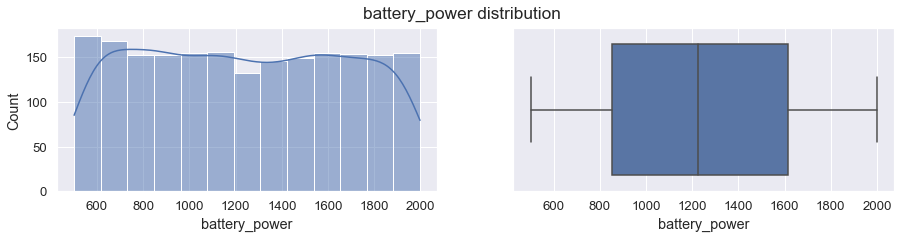

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
battery_power,2000.0,1238.5185,439.418206,501.0,851.75,1226.0,1615.25,1998.0,1497.0,763.5,-293.5,2760.5,0.085466,35.479341


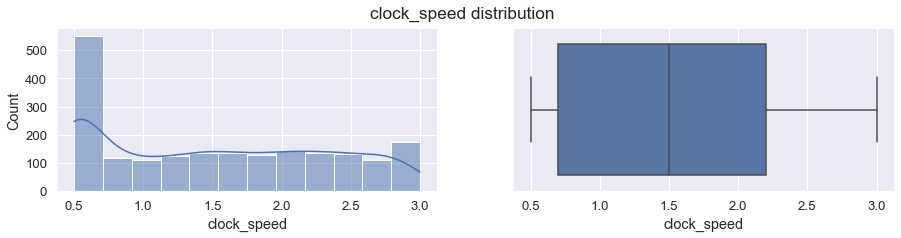

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
clock_speed,2000.0,1.52225,0.816004,0.5,0.7,1.5,2.2,3.0,2.5,1.5,-1.55,4.45,0.081801,53.605138


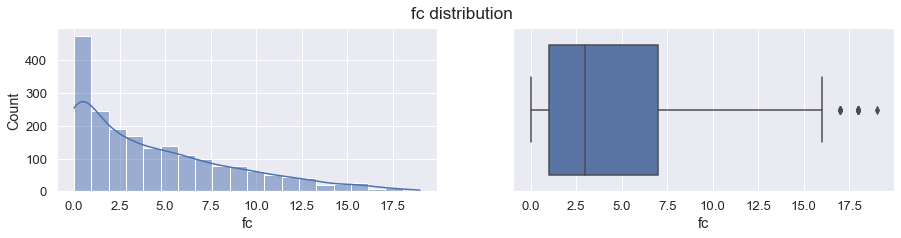

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
fc,2000.0,4.3095,4.341444,0.0,1.0,3.0,7.0,19.0,19.0,6.0,-8.0,16.0,0.904883,100.74124


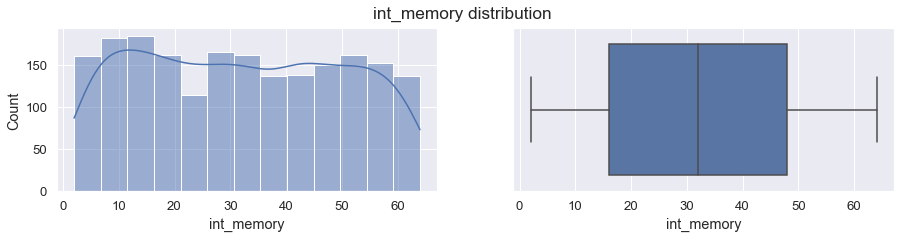

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
int_memory,2000.0,32.0465,18.145715,2.0,16.0,32.0,48.0,64.0,62.0,32.0,-32.0,96.0,0.007688,56.623079


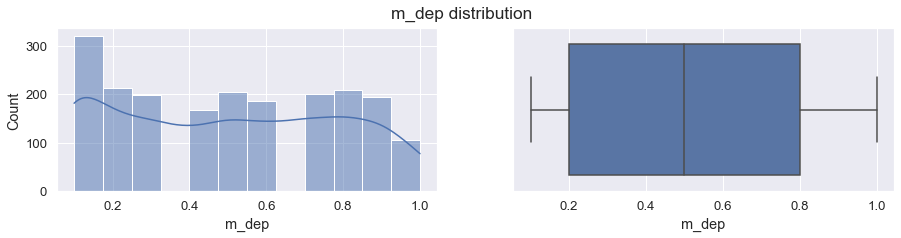

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
m_dep,2000.0,0.50175,0.288416,0.1,0.2,0.5,0.8,1.0,0.9,0.6,-0.7,1.7,0.018203,57.481923


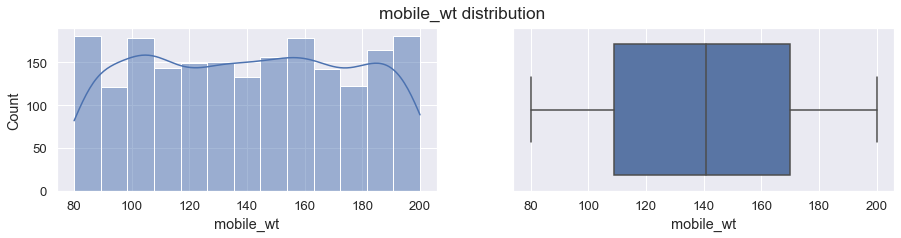

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
mobile_wt,2000.0,140.249,35.399655,80.0,109.0,141.0,170.0,200.0,120.0,61.0,17.5,261.5,-0.063645,25.240576


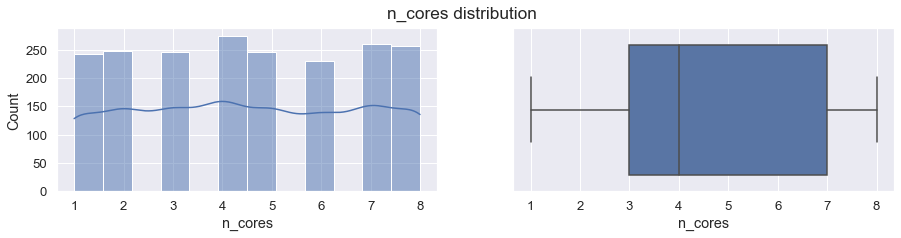

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
n_cores,2000.0,4.5205,2.287837,1.0,3.0,4.0,7.0,8.0,7.0,4.0,-3.0,13.0,0.682522,50.610258


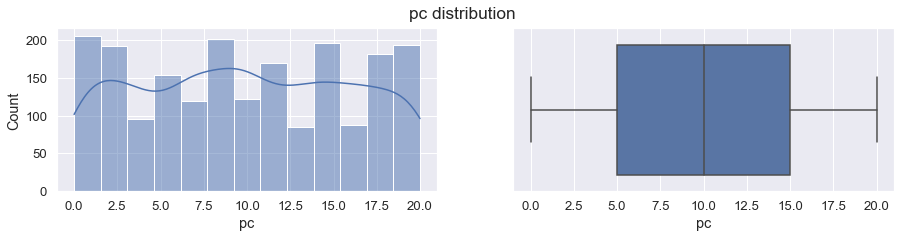

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
pc,2000.0,9.9165,6.064315,0.0,5.0,10.0,15.0,20.0,20.0,10.0,-10.0,30.0,-0.041307,61.153784


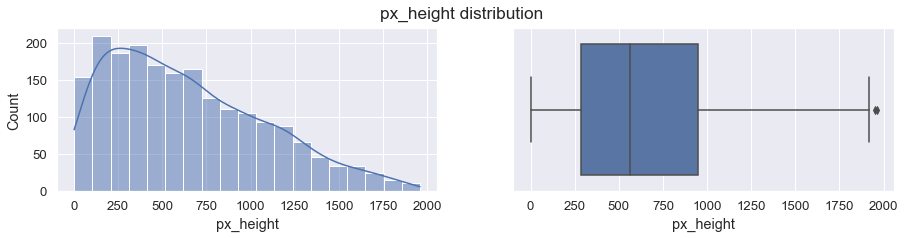

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
px_height,2000.0,645.108,443.780811,0.0,282.75,564.0,947.25,1960.0,1960.0,664.5,-714.0,1944.0,0.548298,68.791708


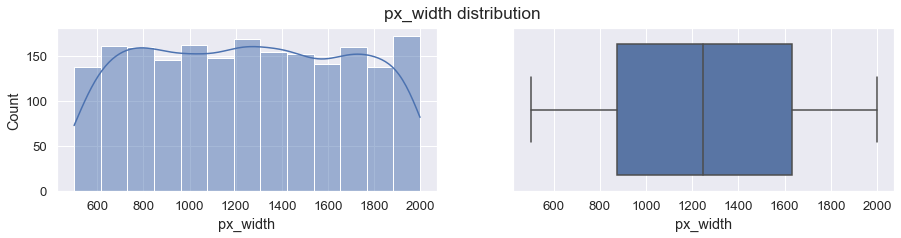

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
px_width,2000.0,1251.5155,432.199447,500.0,874.75,1247.0,1633.0,1998.0,1498.0,758.25,-262.625,2770.375,0.031343,34.534087


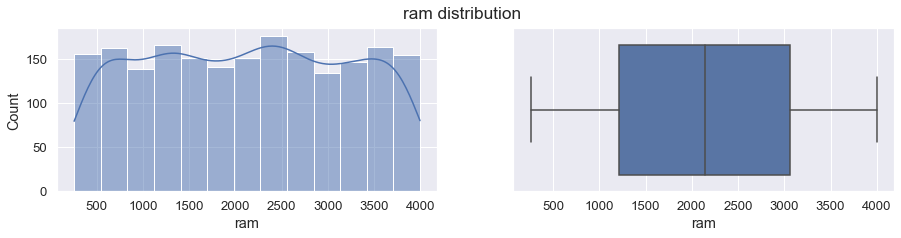

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
ram,2000.0,2124.213,1084.732044,256.0,1207.5,2146.5,3064.5,3998.0,3742.0,1857.0,-1578.0,5850.0,-0.061638,51.065126


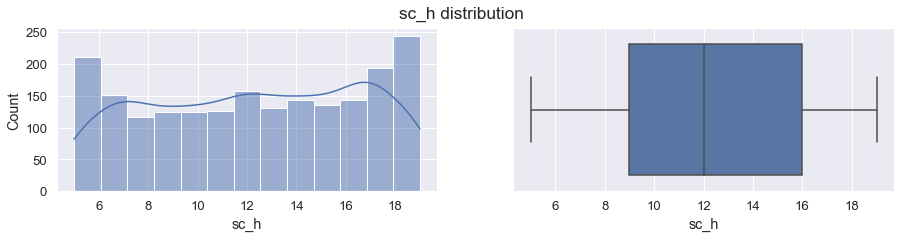

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
sc_h,2000.0,12.3065,4.213245,5.0,9.0,12.0,16.0,19.0,14.0,7.0,-1.5,26.5,0.21824,34.235932


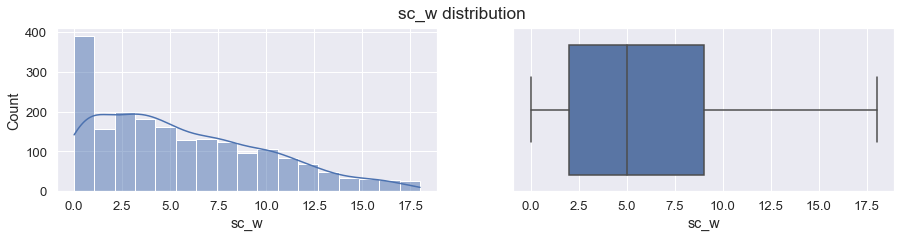

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
sc_w,2000.0,5.767,4.356398,0.0,2.0,5.0,9.0,18.0,18.0,7.0,-8.5,19.5,0.528189,75.540101


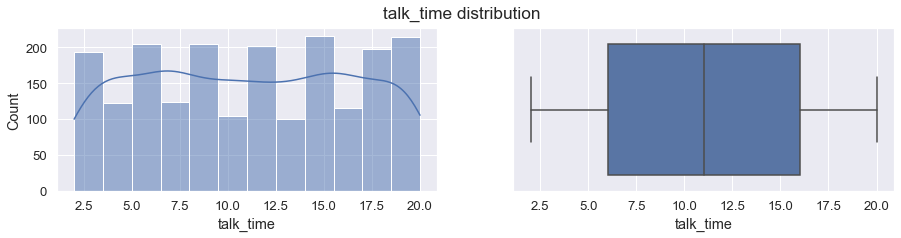

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
talk_time,2000.0,11.011,5.463955,2.0,6.0,11.0,16.0,20.0,18.0,10.0,-9.0,31.0,0.00604,49.622697


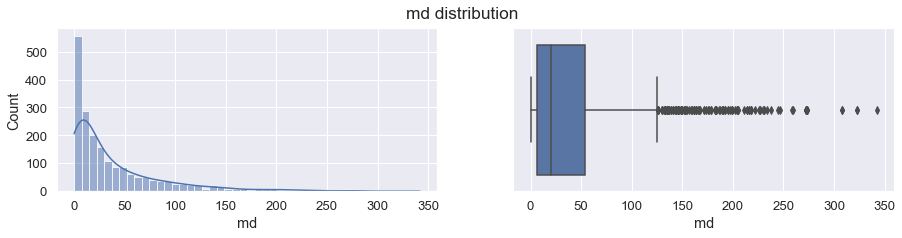

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
md,2000.0,39.79385,50.200476,0.0,6.375,19.8,54.0,342.0,342.0,47.625,-65.0625,125.4375,1.19484,126.151341


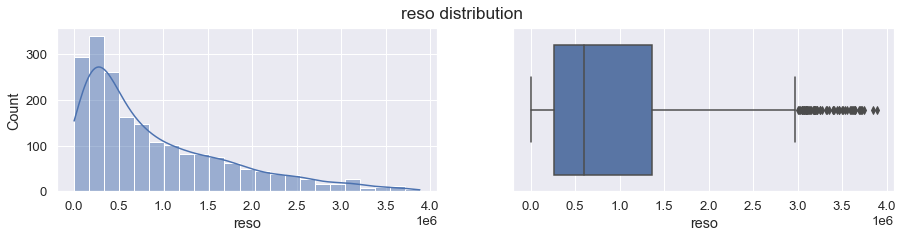

,count,mean,std,min,25%,50%,75%,max,range,iqr,min_whisker,max_whisker,skw,cv
reso,2000.0,905260.0535,829762.496935,0.0,263200.5,601359.0,1359027.25,3886306.0,3886306.0,1095826.75,-1380539.625,3002767.375,1.098752,91.660125


In [23]:
sns.set(rc={'figure.figsize':[15,3]},font_scale=1.2)
quanitative_uni(df,cont_var)

<AxesSubplot:xlabel='clock_speed', ylabel='count'>

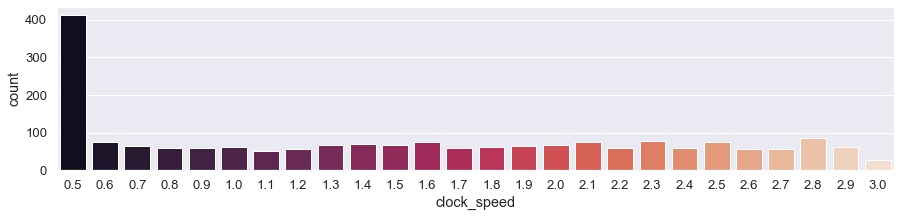

In [24]:
sns.set(rc={'figure.figsize':[15,3]},font_scale=1.2)
sns.countplot(data=df,x='clock_speed',palette='rocket')

<AxesSubplot:xlabel='fc', ylabel='count'>

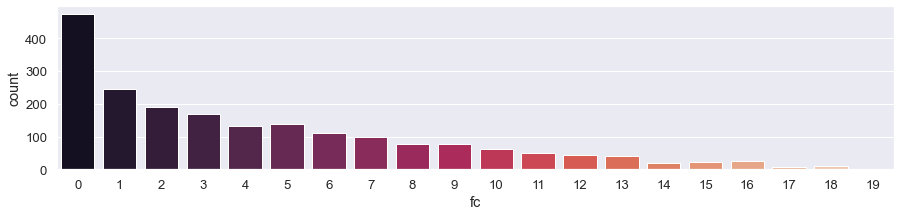

In [25]:
sns.countplot(data=df,x='fc',palette='rocket')

<AxesSubplot:xlabel='m_dep', ylabel='count'>

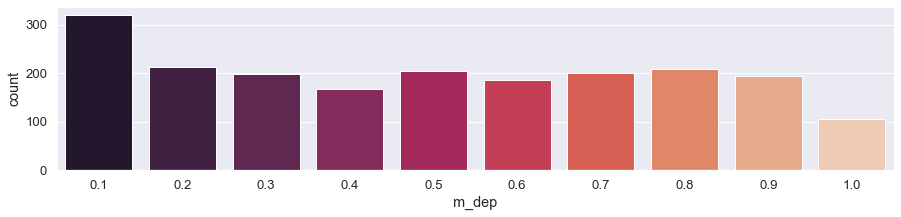

In [26]:
sns.countplot(data=df,x='m_dep',palette='rocket')

<AxesSubplot:xlabel='n_cores', ylabel='count'>

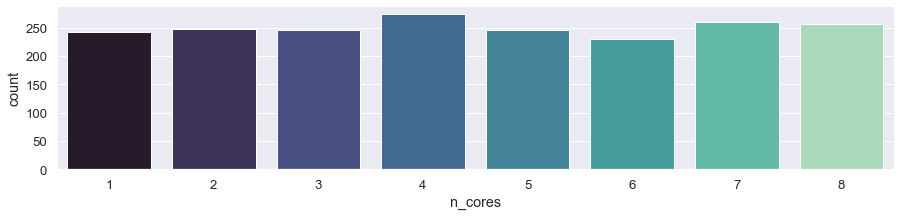

In [27]:
sns.countplot(data=df,x='n_cores',palette='mako')

<AxesSubplot:xlabel='pc', ylabel='count'>

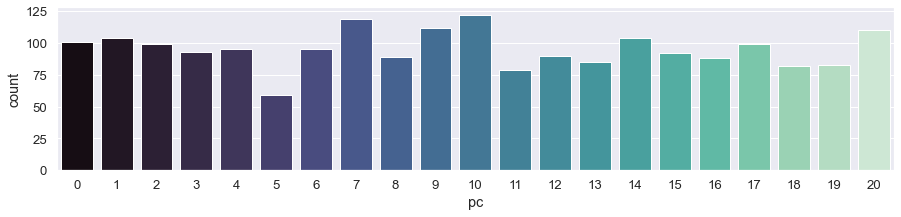

In [28]:
sns.countplot(data=df,x='pc',palette='mako')

<AxesSubplot:xlabel='sc_h', ylabel='count'>

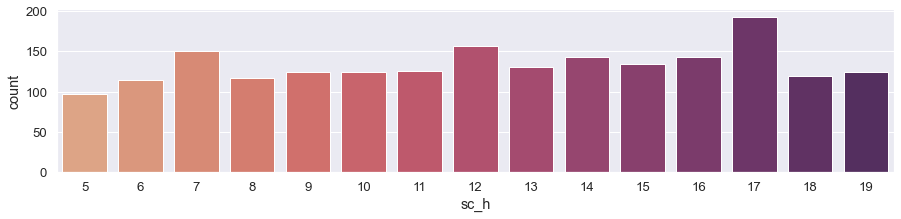

In [29]:
sns.countplot(data=df,x='sc_h',palette='flare')

<AxesSubplot:xlabel='sc_w', ylabel='count'>

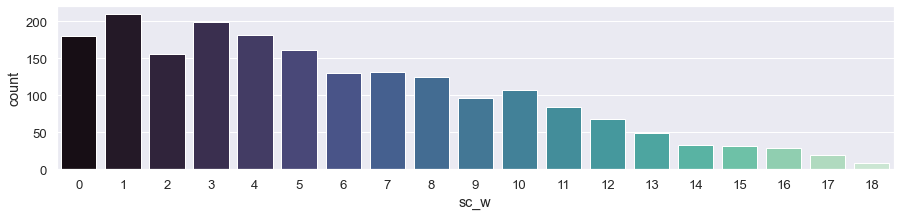

In [30]:
sns.countplot(data=df,x='sc_w',palette='mako')

<AxesSubplot:xlabel='talk_time', ylabel='count'>

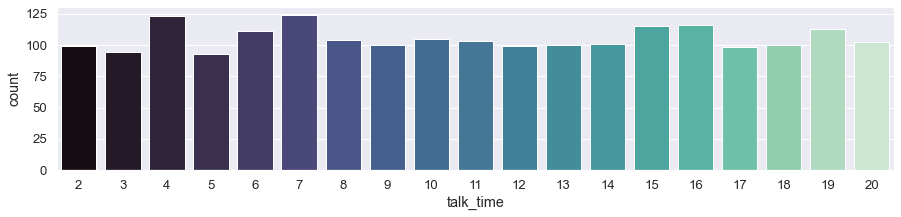

In [31]:
sns.countplot(data=df,x='talk_time',palette='mako')

#### Findings:
<ol>
<li>battery_power:
    <ul>
    <li>Has uniform distribution with mean 1238.51 mAh & std 439.41 mAh which mean that about 66.6% of the population has battery_power in range (1238.51-439.41 ,1238.51 + 439.41 ) mAh</li>
    <li>Sample distribution almost follow the normal distribution with coffiecient of skewens 0.08.</li>
    <li>The middle 50% of the data has battery_power range (851.75,1615.25) mAh, 75% of data ha battery_power less than 1615.25 mAh, lowest 25% has battery_power less than 851.75 mAh and the highest 25% has battery_power greater than 1615.25 mAh .</li>
   <li>battery_power has no outliers with minimum 501.0 mAh & maximum 1998.0 mAh.</li>
    </ul>
    </li>
<li>clock_speed:
    <ul>
        <li>it's seems that it's unimodal with 0.5 as peak value,However the other values almost follow uniform distribution.</li>
        <li>The middle 50% of the data has clock_speed range (0.7,2.2), Actually we have insights that we can deal with clock_speed as a ordinal variable.</li>
        <li>Sample distribution almost follow the normal distribution with coffiecient of skewens 0.081.</li>
    </ul>
</li>
<li>fc:
    <ul>
        <li>fc it's ordinal variables, top frequency on 0, while the middle 50% of the mobiles have fc with range(1,7) mega pixels.</li>
        <li>Now we can see that fc has mega pixels greater than 16 with very small frequency that's why it's appear as outliers.</li>
        <li>dataset has mobiles with minimum 0 & maximum 19 mega pixels on fc, which indicates that 0 means that mobile doesn't has front camera.</li>
    </ul>
</li>
<li>int_memory:
    <ul>
        <li>int_memory it's ordinal variables, it's a multimodal, However the middle 50% of the mobiles have int_memory with range(16,48) Gigabytes.</li>
    </ul>
</li>
<li>m_dep:
    <ul>
        <li>it's ordinal variables, it's a unimodal on peak 0.1 cm, However the middle 50% of the mobiles have int_memory  ranges(0.2:0.8)cm included.</li>
    </ul>
</li>
<li>mobile_wt:
    <ul>
        <li>almost has a uniform distribution, with mean 140.249 & std 35.399 which mean that 66.6% of the mobiles has wight 140.249 (+ or - )35.399.</li>
        <li>the middle 50% of the mobiles have weight in range (109.0,170.0), 75% of data has mobile weight less than 170.0, the lowest 25% has battery_power less than 109.0 and the highest 25% has battery_power greater than 170.0	h   </li>
        <li>Sample distribution almost follow the normal distribution with coffiecient of skewens -0.06.</li>
        <li>battery_power has no outliers with minimum min 80 & max 200.</li>
    </ul>
</li>
<li>n_cores:
    <ul>
        <li>it's ordinal variables, with maximum frequency on 4 core, However the middle 50% of the mobiles have n_cores range(3:7)included.</li>
    </ul>
</li>
<li>pc:
    <ul>
        <li>pc it's ordinal variables, it's a almost a bimodal with on (7 & 10) mega pixels as apeak, while the middle 50% of the mobiles have fc with range(5:15) mega pixels.</li>
        <li>dataset has mobiles with minimum 0 & maximum 20 mega pixels on pc, which indicates that 0 means that mobile doesn't has primary camera.</li>
    </ul>
</li>
<li>px_height:
    <ul>
        <li>Ordinal variables, it's a almost a unimodal, while it's right skewed due to outliers with coffiecient of skewens 0.548.</li>
        <li>px_height mean is 645.108 with (+ or - ) 443.780 std.</li>
        <li>the middle 50% of the mobiles have px_height with range(282.75,947.25).</li>
        <li>px_height range is 1960.0 with minimum 0 & maximum 1960.0.</li>
    </ul>
</li>

<li>px_width:
    <ul>
        <li>Ordinal variables, it's a almost a multimodal, sample distribution almost follows normal distribution with coffiecient of skewens 0.548.</li>
        <li>px_width mean is 1251.515 with (+ or - ) 432.199 std.</li>
        <li>the middle 50% of the mobiles have px_width with range(874.75,1633.0).</li>
        <li>px_height range is 1498.0 with minimum 500.0 & maximum 1998.0.</li>
    </ul>
</li>
<li>ram:
    <ul>
        <li>Ordinal variables, it's a almost a multimodal, sample distribution almost follows normal distribution with coffiecient of skewens -0.061.</li>
        <li>ram mean is 2124.213 with (+ or - ) 1084.732 std.</li>
        <li>the middle 50% of the mobiles on samples have ram with range(1207.5,3064.5).</li>
        <li>ram range is 3742.0 with minimum 256.0 & maximum 3998.0.</li>
    </ul>
</li>
<li>sc_h:
    <ul>
        <li>it's ordinal variables, with Top frequency on  17cm, However the middle 50% of the mobiles have int_memory  ranges(9.0:16.0)cm included.</li>
    </ul>
</li>
<li>sc_w:
    <ul>
        <li>it's ordinal variables, with Top frequency on 1cm, However the middle 50% of the mobiles have int_memory  ranges(2.0:9.0)cm included.</li>
    </ul>
</li>
<li>talk_time:
    <ul>
        <li>it's ordinal variables, with Top frequency on 7, However the middle 50% of the mobiles single battery can last within ranges(06.0:16.0)h while talking time.</li>
    </ul>
</li>
<li>md:
    <ul>
        <li>md feature we create as compute of mobile dimension has alot of outliers which gives us indication that it might be not useful on our model, However it has mean 39.793 + or - 50.200 std .</li>
        <li>it has Positive cofficient of skewenes 1.19 due to outliers .</li>
        <li>the middle 50% of the mobiles md on samples have ram with range(6.375,54.0).</li>
        <li>md range is 342.0 with minimum 0 & maximum 342.0.</li>
    </ul>
</li>
<li>reso:
    <ul>
        <li>reso feature we create as compute of mobile resolution has alot of outliers which gives us indication that it might be not useful on our model, However it has mean 905260.0535	 + or - 829762.496 std .</li>
        <li>It has Positive cofficient of skewenes 1.09 due to outliers .</li>
        <li>the middle 50% of the mobiles reso on samples have ram with range(263200.5,1359027.25).</li>
        <li>md range is 3886306.0 with minimum 0 & maximum 3886306.0.</li>
    </ul>
</li>
</ol>
    

In [32]:
def qualitative_uni(df):
    for col in df.columns:
        if df[col].nunique() <=10:
            frequency = df[col].value_counts() 
            if df[col].nunique() <=4:
                fig,axs = plt.subplots(1,2)
                sns.countplot(data=df,x=col,ax=axs[0])
                axs[1].pie(frequency,labels=frequency.index,autopct='%1.1f%%',startangle=90)
                plt.suptitle(f'{col} frequency')
            else:
                fig,axs = plt.subplots(1,2)
                sns.countplot(data=df,x=col,ax=axs[0])
                plt.title(f'{col} frequency')
            plt.show()
            frequency =pd.DataFrame()
            frequency['cnt'] = df[col].value_counts()
            frequency['%']= df[col].value_counts()/len(df)*100
            display(frequency.T)
            print('*'*70)

In [33]:
sns.set_theme(palette="vlag")

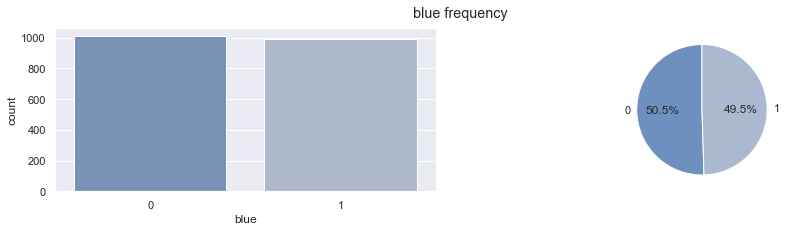

,0,1
cnt,1010.0,990.0
%,50.5,49.5


**********************************************************************


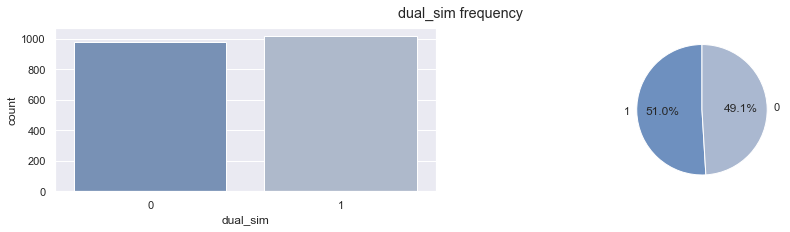

,1,0
cnt,1019.00,981.00
%,50.95,49.05


**********************************************************************


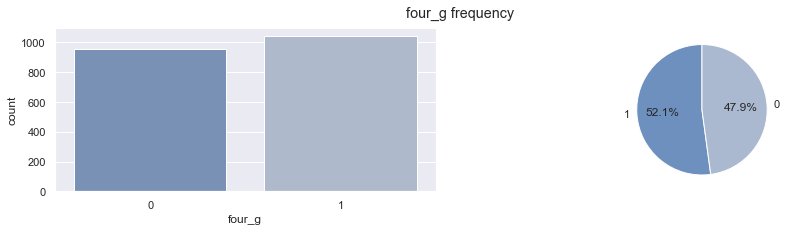

,1,0
cnt,1043.00,957.00
%,52.15,47.85


**********************************************************************


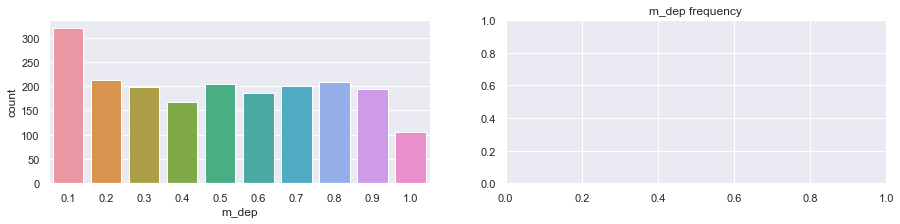

,0.1,0.2,0.8,0.5,0.7,0.3,0.9,0.6,0.4,1.0
cnt,320.0,213.00,208.0,205.00,200.0,199.00,195.00,186.0,168.0,106.0
%,16.0,10.65,10.4,10.25,10.0,9.95,9.75,9.3,8.4,5.3


**********************************************************************


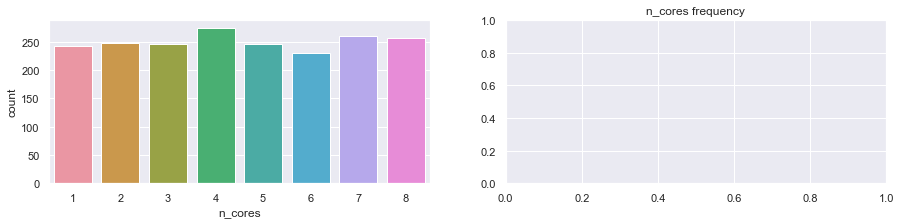

,4,7,8,2,3,5,1,6
cnt,274.0,259.00,256.0,247.00,246.0,246.0,242.0,230.0
%,13.7,12.95,12.8,12.35,12.3,12.3,12.1,11.5


**********************************************************************


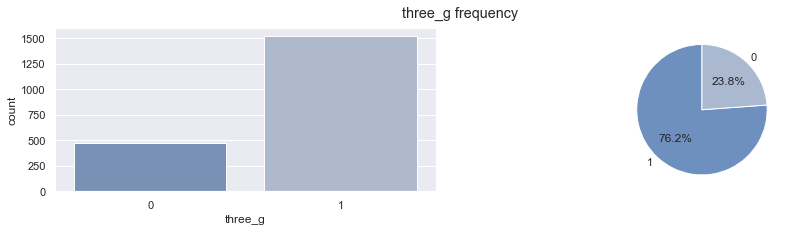

,1,0
cnt,1523.00,477.00
%,76.15,23.85


**********************************************************************


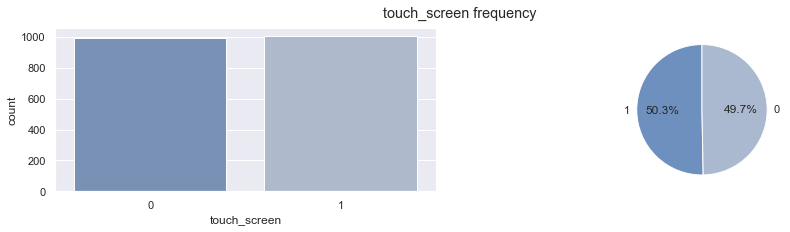

,1,0
cnt,1006.0,994.0
%,50.3,49.7


**********************************************************************


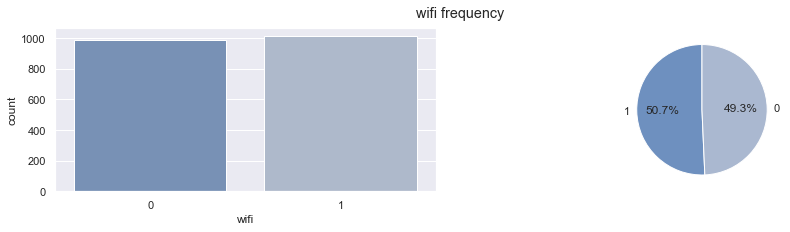

,1,0
cnt,1014.0,986.0
%,50.7,49.3


**********************************************************************


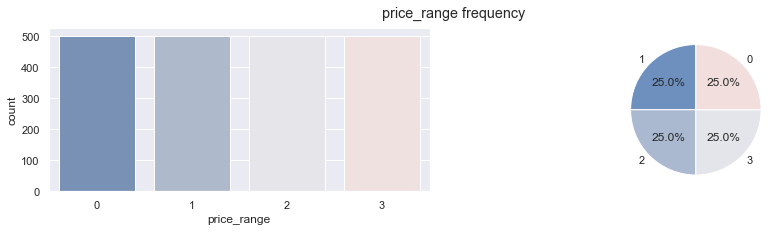

,1,2,3,0
cnt,500.0,500.0,500.0,500.0
%,25.0,25.0,25.0,25.0


**********************************************************************


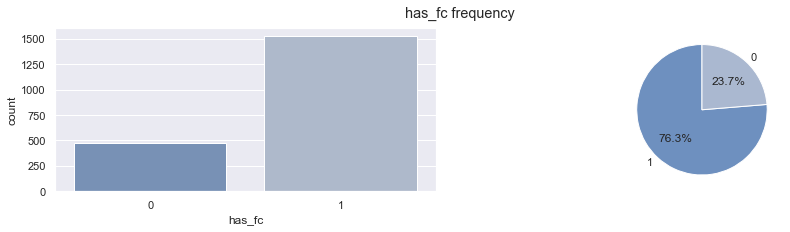

,1,0
cnt,1526.0,474.0
%,76.3,23.7


**********************************************************************


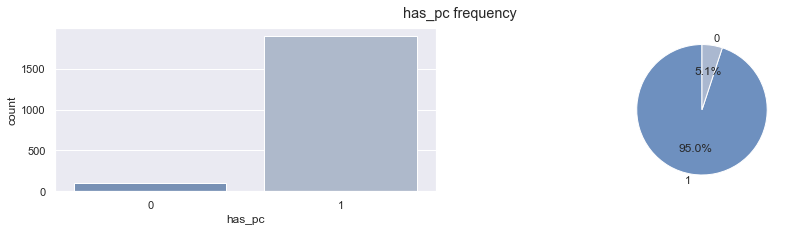

,1,0
cnt,1899.00,101.00
%,94.95,5.05


**********************************************************************


In [34]:
qualitative_uni(df)

#### Findings:
<ol>
<li>blue:Feature almost balanced, a mobile doesn't has bluetooth is greater than mobile has by only 1%.</li>
<li>dual_sim:Feature almost balanced ,a mobile has dual_sim is greater than mobile hasn't by only 1%.</li>
<li>four_g:mobiles support four_g reprsent 52.1% of the dataset it's more than mobile doesn't support 4G by 4%.</li>
<li>m_dep:has 10 unique values 0.1 represnt mobiles support four_g reprsent 52.1% of the dataset it's more than mobile doesn't support 4G by 4%.</li> 
<li>n_cores:has 8 unique values almost balanced while core 4 represnt the maximum about 13.7% of the dataset as mentioed above.</li>
<li>three_g:mobiles support three_g reprsent 76.15% of the dataset it's more than mobile doesn't support which represent only 23.85% of the dataset.</li>
<li>touch_screen:Feature almost balanced ,a mobile has touch reprsent 50.3% while the others reprsent 49.7%.</li>
<li>wifi:Feature almost balanced ,a mobile has wifi reprsent 50.7% while the others reprsent 49.3%.</li>
<li>price_range:Feature has 4 values it's balanced,each value reprsent 25% of the dataset , we should declare that it's ordinal variables.</li>
<li>has_fc:Mobile has front camera represent 76.3% of the dataset while the other not has represent 23.7%.</li>
<li>has_pc:only 5.05% doesn't has primary camera while 94.95% of the mobiles on the dataset has primary camera.</li>
<li>Finally: we can conclude that our data variable are ordinal & nominal data type.</li>
</ol>
    

<li><a id='bi'></a>bivariate Analysis</li>

* From above we conclude that our sample dataset have nominal & ordinal data type so we can't depend only on pearson correlation cofficient(r) to measure the correlations between features.
* let's clarify steps we will moving on: 
as we have large sample size 2000 raw data so we will measure the correlation between variables following these process:
<ul>
    <li>First of all we measure pearson's correlation cofficient with all features just to check, then.</li>
    <li>Measure correlation between Two ordinal variables using pearson's correlation cofficient, Kindla's Tau & Spearman's Rho.</li>
    <li>Measure correlation between one Nominal variable and one ordinal variable or Two Nonminal variables using phi test.</li>
</ul>

#### pearson's correlation cofficient with all features

In [35]:
peasron_corr=df.corr()
peasron_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,md,reso,has_fc,has_pc
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723,-0.019614,0.018442,0.016559,-0.009816
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573,-0.010198,-0.015513,-0.012629,-0.013724
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606,-0.014951,-0.009854,-0.009878,0.014407
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444,-0.027735,-0.017730,-0.022337,0.020369
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998,-0.013944,-0.012337,0.553367,0.228981
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772,0.038759,-0.009064,-0.034857,-0.028927
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435,0.001014,0.015263,-0.004470,0.009024
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853,0.456079,0.025138,0.038451,0.020405
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302,-0.010405,-0.006036,0.028872,0.021494
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399,0.031836,0.001245,-0.018652,-0.004422


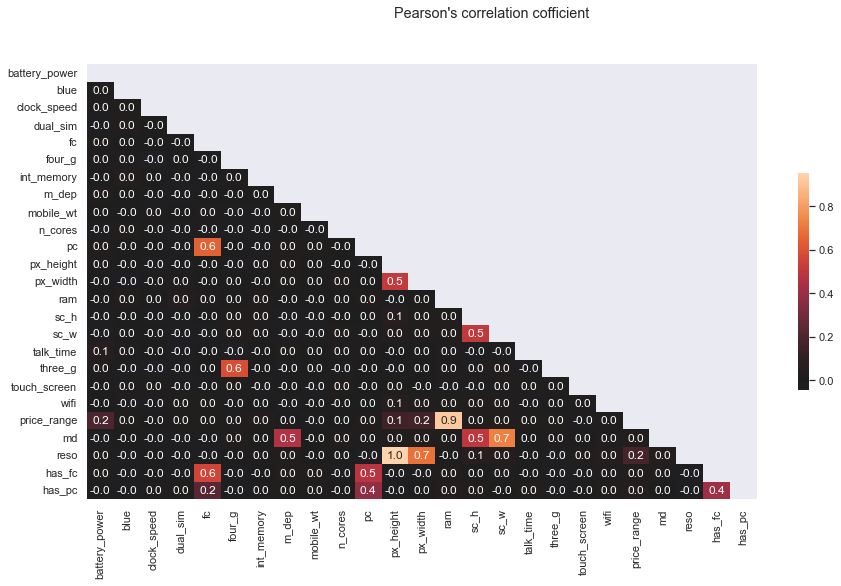

In [36]:
sns.set(rc={'figure.figsize':[15,8]},font_scale=1)
mask=np.triu(np.ones_like(peasron_corr,dtype=bool))
sns.heatmap(peasron_corr,mask=mask,annot=True,fmt='0.1f',center=0,cbar_kws={'shrink':0.5})
plt.suptitle('Pearson\'s correlation cofficient');

In [37]:
abs(df.corr()[['price_range']]).sort_values(by='price_range',ascending=False)

,price_range
price_range,1.000000
ram,0.917046
battery_power,0.200723
reso,0.176240
px_width,0.165818
px_height,0.148858
int_memory,0.044435
has_pc,0.043910
sc_w,0.038711
pc,0.033599


<AxesSubplot:>

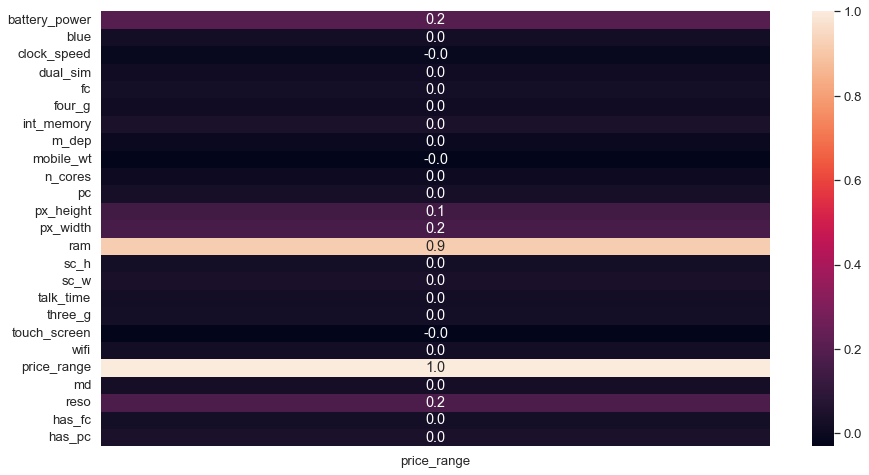

In [38]:
sns.set(rc={'figure.figsize':[15,8]},font_scale=1.2)
sns.heatmap(df.corr()[['price_range']],annot=True,fmt='0.1f')

* Findings:
<ol>
<li>as we expect we can't depend on the pearson's correlation cofficient between these types of features it seem's that no linear correlation between most of them especially with the target feature 'price_range', only ram has a very strong positive linear correlation with the price range +0.90 while the other feature has maximum positive 0.2 for battery_power,px_width & reso features.</li>
<li>px_height & px_width almost have multicolinearity +0.5 also we should not forget the new features we have created has multicolinearity with the base features created from which is (reso with px_width & px_height), (md with sc_h & sc_w) & finally (has_pc & has_fc with pc & fc) respectively.</li>
</ol>

#### Now let's divide the features into nominal & ordinal variables

In [39]:
ord_cat=[]
nom_cat=[]
for col in df.columns:
    if df[col].nunique() >2:
        ord_cat.append(col)
    else:
        nom_cat.append(col)
print(f'Ordinal variable has {len(ord_cat)} features\n{ord_cat}\nNominal variable has {len(nom_cat)} features\n{nom_cat}')

Ordinal variable has 17 features
['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'price_range', 'md', 'reso']
Nominal variable has 8 features
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'has_fc', 'has_pc']


<li>Measure correlation between Two ordinal variables using pearson's correlation cofficient, Kindla's Tau & Spearman's Rho.</li>

### pearson's correlation cofficient: Measures the linear correlation between two variables.

In [40]:
ord_pearson_corr= df[ord_cat].corr()
ord_pearson_corr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,md,reso
battery_power,1.000000,0.011482,0.033334,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.200723,-0.019614,0.018442
clock_speed,0.011482,1.000000,-0.000434,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.006606,-0.014951,-0.009854
fc,0.033334,-0.000434,1.000000,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.021998,-0.013944,-0.012337
int_memory,-0.004004,0.006545,-0.029133,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,0.044435,0.001014,0.015263
m_dep,0.034085,-0.014364,-0.001791,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,0.000853,0.456079,0.025138
mobile_wt,0.001844,0.012350,0.023618,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,-0.030302,-0.010405,-0.006036
n_cores,-0.029727,-0.005724,-0.013356,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,0.004399,0.031836,0.001245
pc,0.031441,-0.005245,0.644595,-0.033273,0.026282,0.018844,-0.001193,1.000000,-0.018465,0.004196,0.028984,0.004938,-0.023819,0.014657,0.033599,0.013315,-0.017451
px_height,0.014901,-0.014523,-0.009990,0.010441,0.025263,0.000939,-0.006872,-0.018465,1.000000,0.510664,-0.020352,0.059615,0.043038,-0.010645,0.148858,0.037718,0.952730
px_width,-0.008402,-0.009476,-0.005176,-0.008335,0.023566,0.000090,0.024480,0.004196,0.510664,1.000000,0.004105,0.021599,0.034699,0.006720,0.165818,0.033116,0.684062


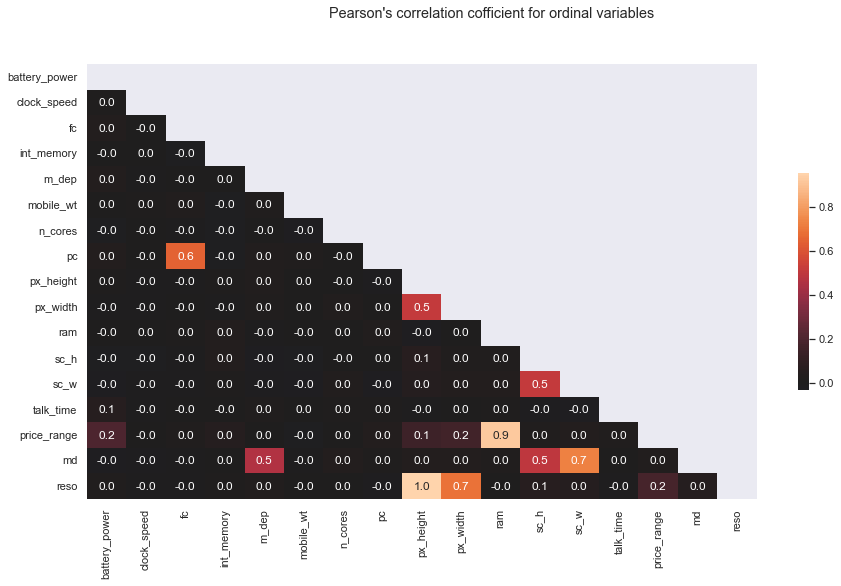

In [41]:
sns.set(rc={'figure.figsize':[15,8]},font_scale=1)
mask=np.triu(np.ones_like(ord_pearson_corr,dtype=bool))
sns.heatmap(ord_pearson_corr,mask=mask,annot=True,fmt='0.1f',center=0,cbar_kws={'shrink':0.5})
plt.suptitle('Pearson\'s correlation cofficient for ordinal variables');

#### Findings:
<li>ram has a very strong positive linear correlation with the price_range +0.92 </li>
<li>battery_power, px_width, reso & px_height has a very weak positive linear correlation with the price range within range( +0.15, +0.2).</li>
<li>others features has no linear correlation with the target feature price_range.</li>

**multicolinearity between some features as follwing:**
<li>px_height has a meduium positive linear correlation with px_width +0.51 </li>
<li>pc has a meduium positive linear correlation with fc +0.64 </li>
<li>reso has a meduium positive linear correlation with px_width +0.68 while it has a very strong linear correlation with px_height +.95 almost perfect.</li>
<li>md has a weak positive linear correlation with sc_h +0.49 & m_dep +0.46 while it has a meduium linear correlation with sc_w +.73 almost strong.</li>

**there are a rule thumb that: a correlation less than 0.8 or greater than -0.8 is considered insignificant and not strongly correlated.**

**Let's visualize the linear crrelation cofficient with the targat feature 'price_range'**

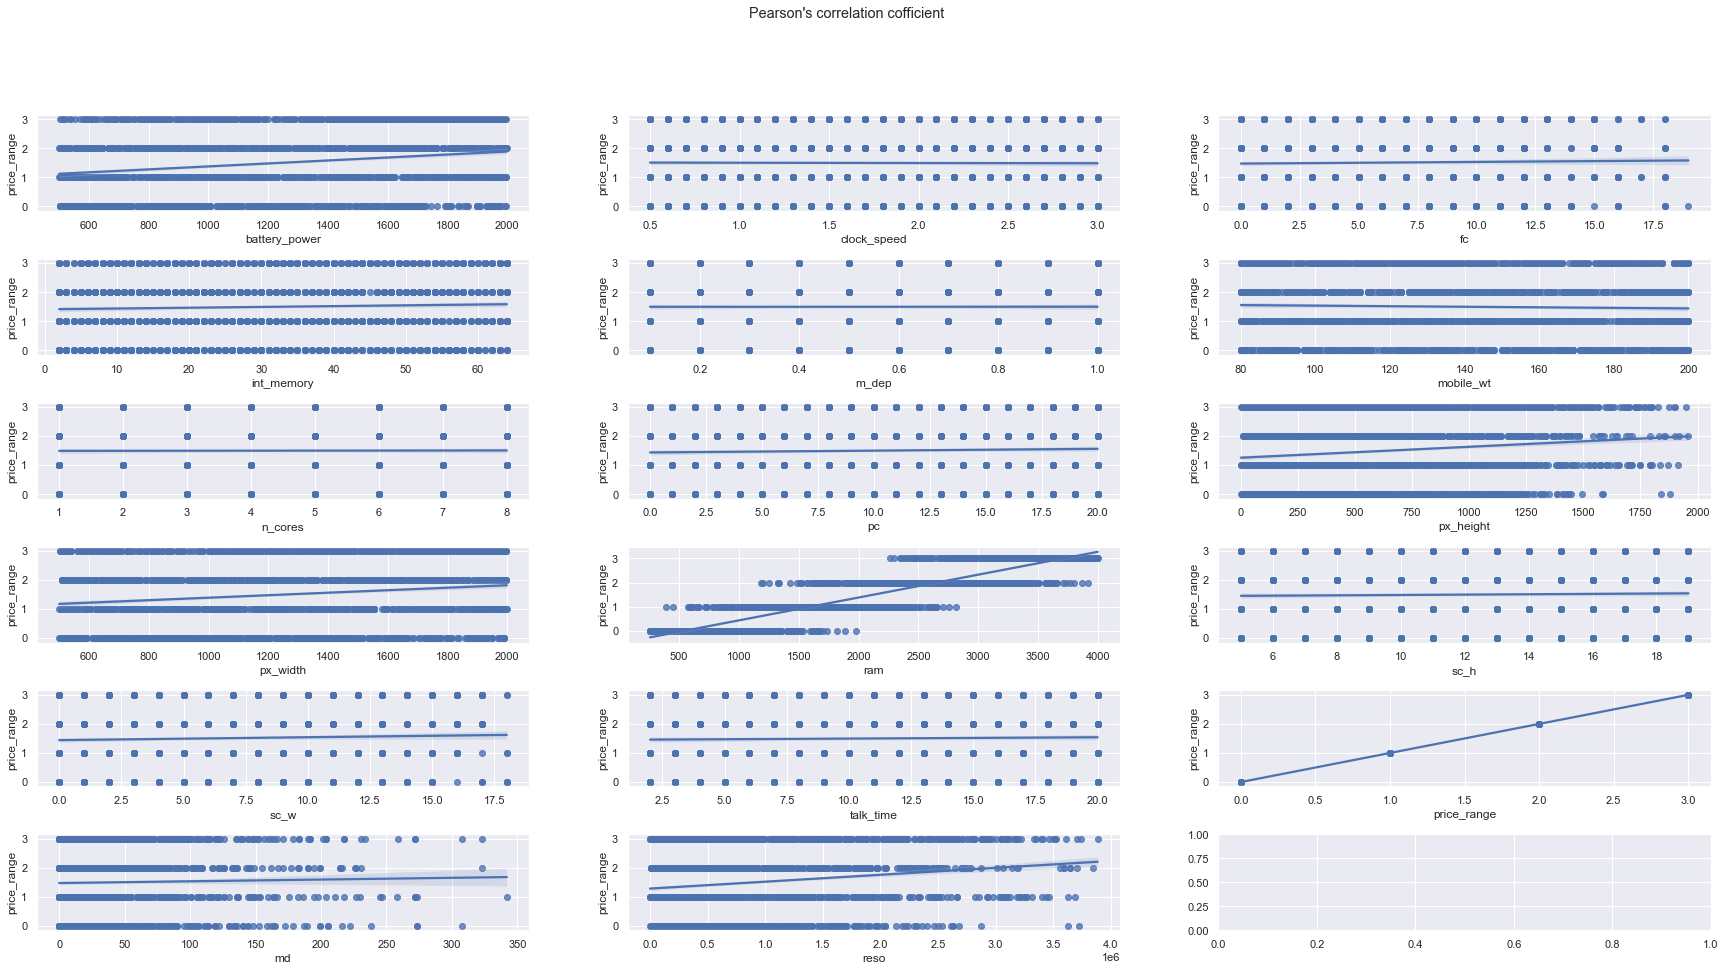

In [42]:
fig,axs = plt.subplots(6,3,figsize=(30,15),facecolor='w',edgecolor='k')
fig.subplots_adjust(hspace=0.5, wspace=0.2)
# sns.set_theme(palette='mako')
axs=axs.ravel()
for i,col in enumerate(df[ord_cat].columns):
    sns.regplot(data=df,x=col,y='price_range',ax=axs[i])
plt.suptitle('Pearson\'s correlation cofficient');

* from graph above we can conclude that there are no linear correlation between any two variables even variables which have high correlation between each other like ram & price_range however it has +0.92 but when we plot it it's there are no linear correlation between each othere so le's check Kendall Rank correlation Coefficient & spearman Rho correlation coefficient 

###  Kendall rank correlation cofficient: Measures the ordinal association between two variables.
* It's doesn't assume a normal distribution of the variables and is looking for a monotonic relationship between two variables.
* Two variables are monotonic correlated if any greater value of the one variable will result in a greater value of the other variable. 
* If the variables is negatively monotonic correlated ,then it's opposite.

In [43]:
kend_corr= df[ord_cat].corr(method='kendall')
kend_corr

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,md,reso
battery_power,1.000000,0.006603,0.024388,-0.002865,0.023098,0.001878,-0.020973,0.020742,0.006531,-0.005814,-0.000890,-0.020212,-0.018511,0.036456,0.148461,-0.012355,0.002739
clock_speed,0.006603,1.000000,-0.003810,0.003745,-0.010848,0.007501,-0.006123,-0.004388,-0.009087,-0.005857,0.003259,-0.021466,-0.010416,-0.009458,-0.003844,-0.011752,-0.008169
fc,0.024388,-0.003810,1.000000,-0.019190,0.009543,0.018826,-0.011480,0.523825,-0.014535,-0.006597,0.013798,-0.006786,-0.000847,-0.000524,0.018601,-0.001094,-0.014410
int_memory,-0.002865,0.003745,-0.019190,1.000000,0.004909,-0.023407,-0.020125,-0.022935,-0.001360,-0.005737,0.022375,0.027785,0.011268,-0.001736,0.033267,0.016167,-0.005900
m_dep,0.023098,-0.010848,0.009543,0.004909,1.000000,0.015925,-0.003849,0.020159,0.018704,0.016253,-0.007041,-0.017843,-0.014479,0.012124,-0.000241,0.330922,0.022567
mobile_wt,0.001878,0.007501,0.018826,-0.023407,0.015925,1.000000,-0.013885,0.012742,0.007914,0.000666,-0.001588,-0.023864,-0.013791,0.004527,-0.022748,-0.001843,0.009703
n_cores,-0.020973,-0.006123,-0.011480,-0.020125,-0.003849,-0.013885,1.000000,-0.001510,-0.003274,0.017428,0.003783,0.000305,0.020966,0.009534,0.003757,0.014679,0.005795
pc,0.020742,-0.004388,0.523825,-0.022935,0.020159,0.012742,-0.001510,1.000000,-0.010138,0.002166,0.019834,0.003728,-0.024928,0.010135,0.025082,-0.014494,-0.005632
px_height,0.006531,-0.009087,-0.014535,-0.001360,0.018704,0.007914,-0.003274,-0.010138,1.000000,0.332891,-0.020713,0.036851,0.020534,-0.006992,0.098565,0.032432,0.821273
px_width,-0.005814,-0.005857,-0.006597,-0.005737,0.016253,0.000666,0.017428,0.002166,0.332891,1.000000,0.002172,0.015966,0.017491,0.004247,0.123132,0.026783,0.511841


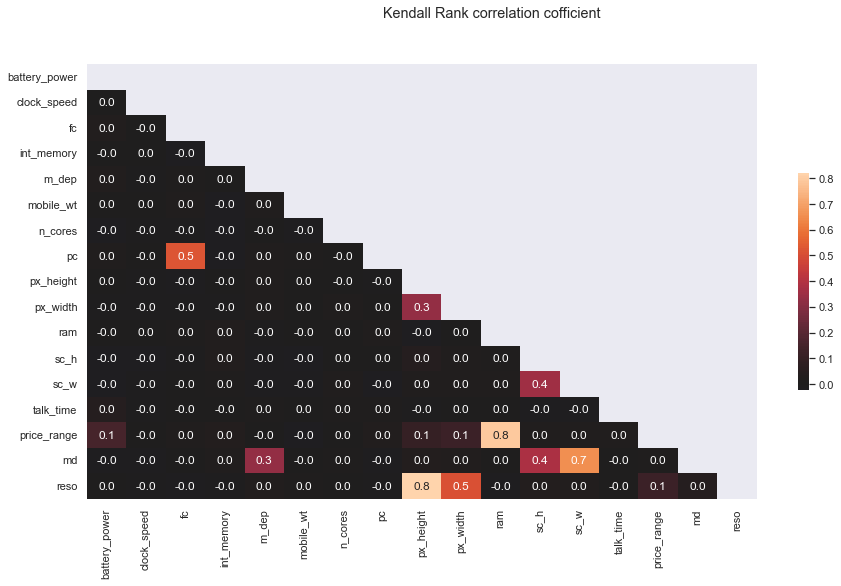

In [44]:
sns.set(rc={'figure.figsize':[15,8]},font_scale=1)
mask=np.triu(np.ones_like(kend_corr,dtype=bool))
sns.heatmap(kend_corr,mask=mask,annot=True,fmt='0.1f',center=0,cbar_kws={'shrink':0.5})
plt.suptitle('Kendall Rank correlation cofficient');

#### Findings:
Kendall rank correlation almost less than Pearson's correlation cofficient, However we should declare that these are two different measures and can not be directly compared as they measure different aspects.
* The pearson method can be thought of how close the points are to a fitted line, while the kendallmethod looks if the one variable grows does the other. 
* as we can see on the map this only happen on the cases that we have mentioned above but the values is decreases, while there are many instances where it doesn't happen.

### Spearman rank correlation cofficient: Measures if the realationship between two variables is monotonic.
* Spearman is closely related to Kendall & measures whether the variables are monotonically correlated 

In [45]:
sper_corr = df[ord_cat].corr(method='spearman')
sper_corr 

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,price_range,md,reso
battery_power,1.000000,0.009161,0.034931,-0.003748,0.033412,0.001752,-0.029800,0.030757,0.009490,-0.009040,-0.001285,-0.029283,-0.026544,0.052730,0.199991,-0.018829,0.004239
clock_speed,0.009161,1.000000,-0.005288,0.005447,-0.014712,0.010773,-0.008159,-0.005925,-0.013043,-0.008619,0.004119,-0.030092,-0.015129,-0.012699,-0.005436,-0.017085,-0.011959
fc,0.034931,-0.005288,1.000000,-0.027282,0.012780,0.027134,-0.015530,0.659161,-0.020919,-0.009170,0.019897,-0.009578,-0.001169,-0.001404,0.024167,-0.001754,-0.020223
int_memory,-0.003748,0.005447,-0.027282,1.000000,0.007380,-0.034259,-0.028375,-0.033373,-0.001568,-0.008511,0.033061,0.040244,0.015987,-0.002436,0.044278,0.023991,-0.008745
m_dep,0.033412,-0.014712,0.012780,0.007380,1.000000,0.022438,-0.004791,0.027605,0.026156,0.023180,-0.010398,-0.023964,-0.019489,0.016665,-0.000322,0.451116,0.031676
mobile_wt,0.001752,0.010773,0.027134,-0.034259,0.022438,1.000000,-0.019437,0.019011,0.011230,0.000783,-0.002731,-0.033955,-0.018952,0.006343,-0.030214,-0.002486,0.013777
n_cores,-0.029800,-0.008159,-0.015530,-0.028375,-0.004791,-0.019437,1.000000,-0.001986,-0.004529,0.024329,0.005118,0.000575,0.029032,0.013359,0.004651,0.020476,0.008064
pc,0.030757,-0.005925,0.659161,-0.033373,0.027605,0.019011,-0.001986,1.000000,-0.015187,0.003462,0.028860,0.005105,-0.034842,0.014256,0.032824,-0.020395,-0.008063
px_height,0.009490,-0.013043,-0.020919,-0.001568,0.026156,0.011230,-0.004529,-0.015187,1.000000,0.467538,-0.030543,0.053575,0.029327,-0.010004,0.131884,0.048054,0.956040
px_width,-0.009040,-0.008619,-0.009170,-0.008511,0.023180,0.000783,0.024329,0.003462,0.467538,1.000000,0.003433,0.022846,0.025057,0.006535,0.165134,0.039899,0.682780


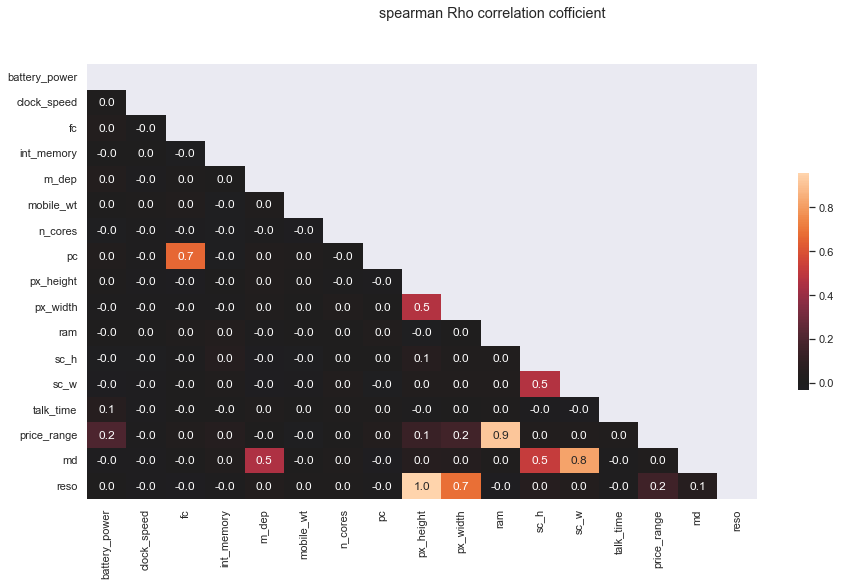

In [46]:
sns.set(rc={'figure.figsize':[15,8]},font_scale=1)
mask=np.triu(np.ones_like(sper_corr ,dtype=bool))
sns.heatmap(sper_corr ,mask=mask,annot=True,fmt='0.1f',center=0,cbar_kws={'shrink':0.5})
plt.suptitle('spearman Rho correlation cofficient');

#### Findings:
Spearman Rho correlation is close enough to Pearson's correlation cofficient due to the sample size that we mentioned on the beginnig as Kendall Rank should be used for smaller sample also we can use Pearson's correlation cofficient in large sample size. However we should declare that these are two different measures and can not be directly compared as they measure different aspects.
Now we can conclude that:
* When px_height increase the resolution increase in a more way than when px_width increase.
* When ram increase the price_range increase.

<li>Measure correlation between one Nominal variable and one ordinal variable or Two Nonminal variables using phi test.</li>


In [47]:
phik_overview= df.phik_matrix().round(2)
phik_overview

interval columns not set, guessing: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range', 'md', 'reso', 'has_fc', 'has_pc']


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,sc_w,talk_time,three_g,touch_screen,wifi,price_range,md,reso,has_fc,has_pc
battery_power,1.00,0.04,0.10,0.07,0.00,0.00,0.11,0.10,0.11,0.06,...,0.00,0.12,0.00,0.00,0.00,0.21,0.00,0.11,0.00,0.00
blue,0.04,1.00,0.06,0.04,0.00,0.00,0.08,0.04,0.00,0.00,...,0.05,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00
clock_speed,0.10,0.06,1.00,0.00,0.05,0.04,0.00,0.00,0.00,0.08,...,0.00,0.09,0.08,0.08,0.00,0.00,0.09,0.00,0.00,0.00
dual_sim,0.07,0.04,0.00,1.00,0.00,0.00,0.00,0.08,0.05,0.00,...,0.00,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
fc,0.00,0.00,0.05,0.00,1.00,0.05,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.06,0.06,0.00,0.09,0.05,0.90,0.39
four_g,0.00,0.00,0.04,0.00,0.05,1.00,0.00,0.00,0.07,0.06,...,0.00,0.05,0.79,0.00,0.00,0.01,0.00,0.07,0.04,0.02
int_memory,0.11,0.08,0.00,0.00,0.00,0.00,1.00,0.07,0.10,0.02,...,0.05,0.00,0.04,0.03,0.01,0.07,0.00,0.00,0.00,0.06
m_dep,0.10,0.04,0.00,0.08,0.00,0.00,0.07,1.00,0.07,0.05,...,0.00,0.05,0.00,0.09,0.02,0.03,0.51,0.08,0.00,0.05
mobile_wt,0.11,0.00,0.00,0.05,0.00,0.07,0.10,0.07,1.00,0.05,...,0.05,0.00,0.00,0.00,0.00,0.04,0.00,0.04,0.02,0.05
n_cores,0.06,0.00,0.08,0.00,0.00,0.06,0.02,0.05,0.05,1.00,...,0.06,0.00,0.03,0.00,0.00,0.00,0.00,0.03,0.00,0.03


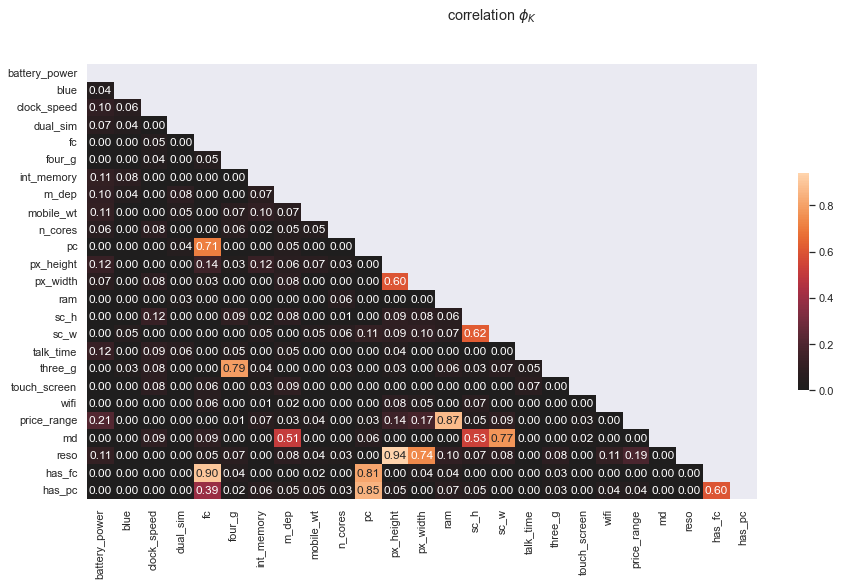

In [48]:
sns.set(rc={'figure.figsize':[15,8]},font_scale=1)
mask=np.triu(np.ones_like(phik_overview ,dtype=bool))
sns.heatmap(phik_overview ,mask=mask,annot=True,fmt='0.2f',center=0,cbar_kws={'shrink':0.5})
plt.suptitle('correlation $\phi_K$');

* We find a new correlation between for_g & three_g +0.79.

#### Relation between price_range & Independent variables

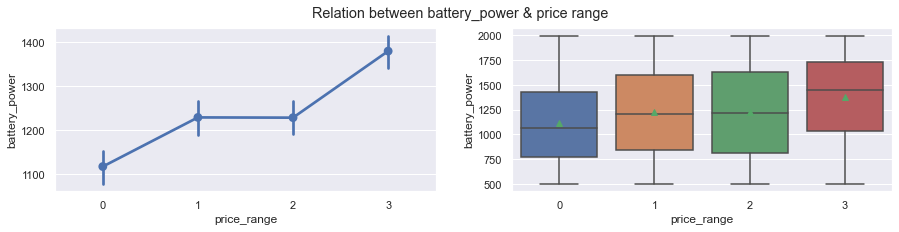

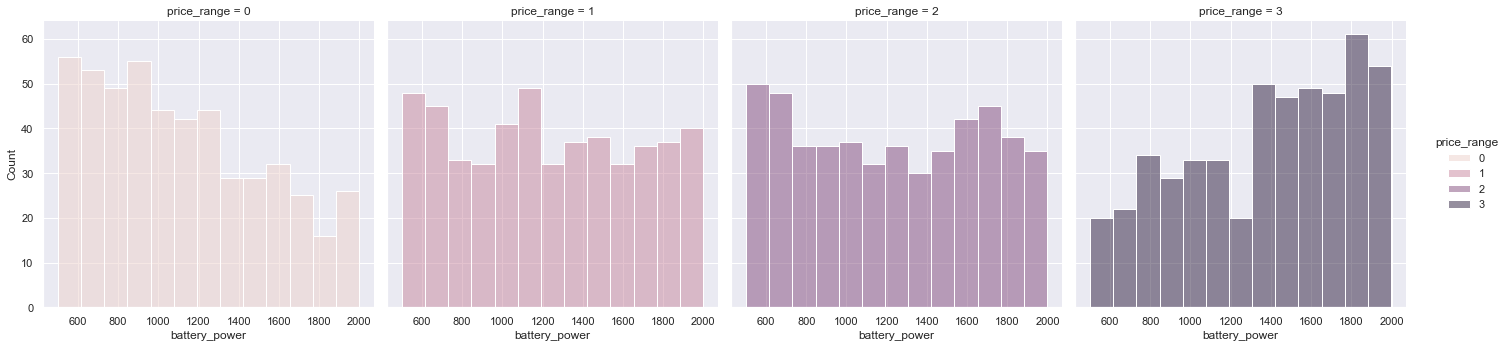

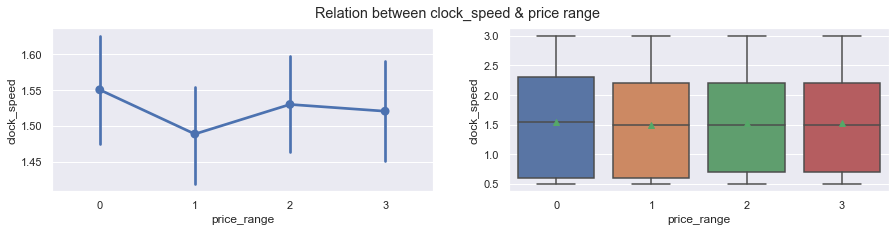

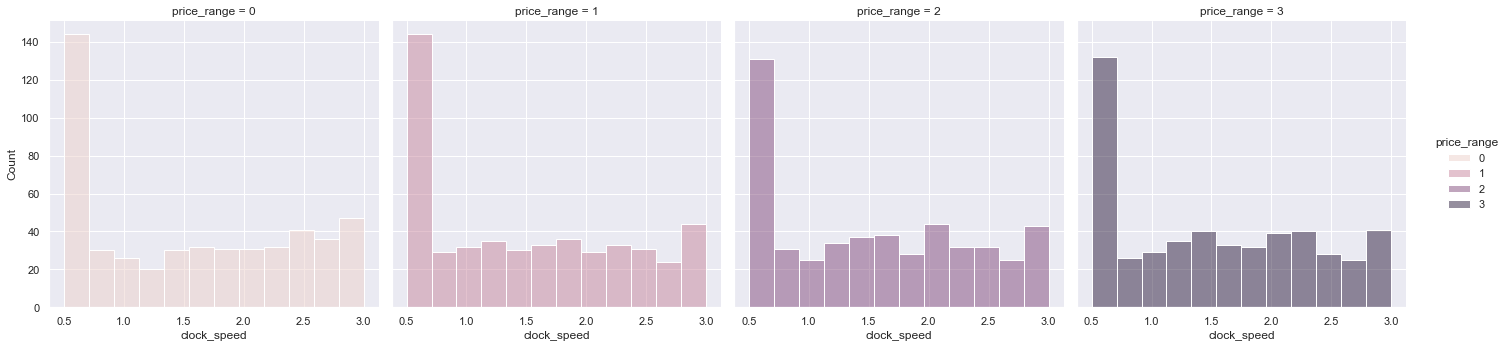

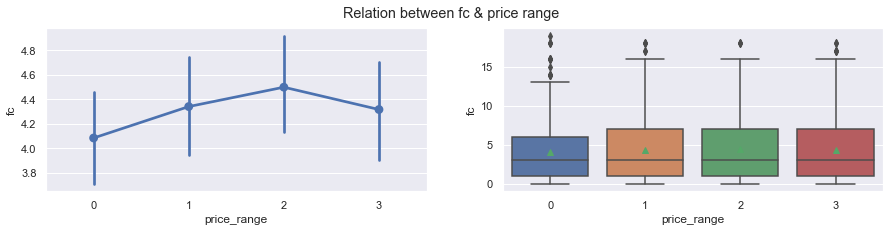

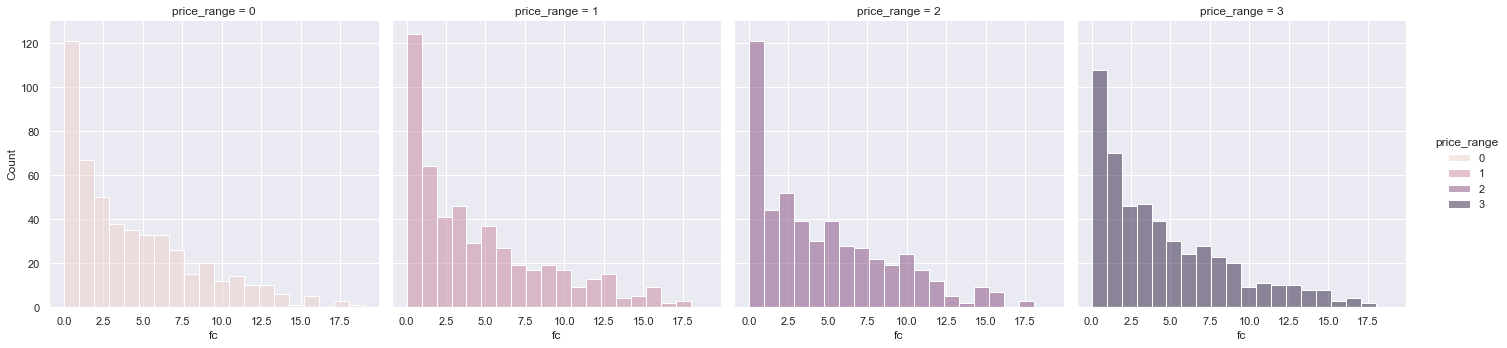

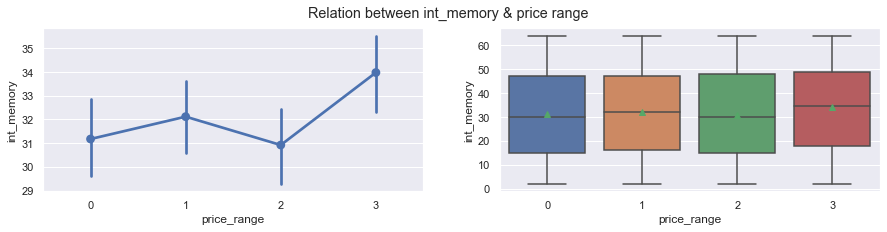

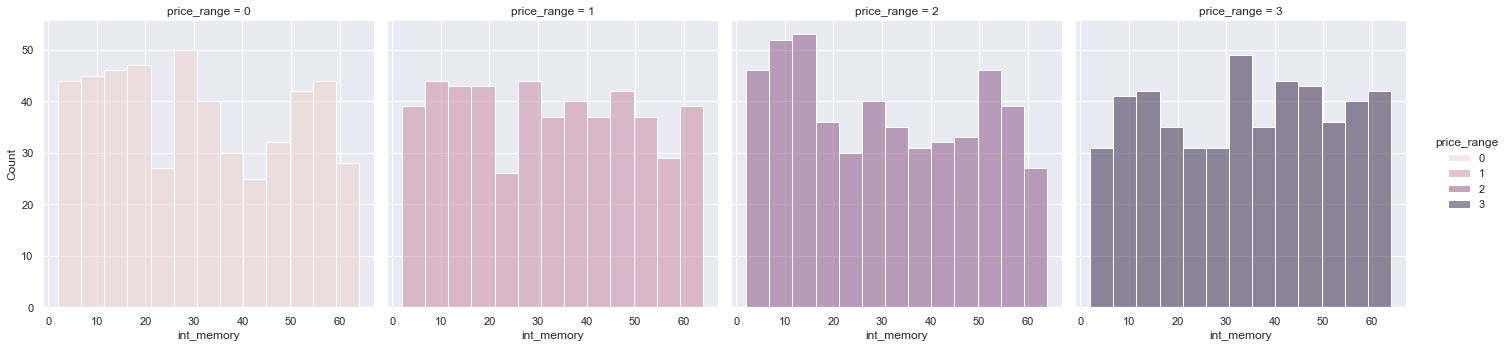

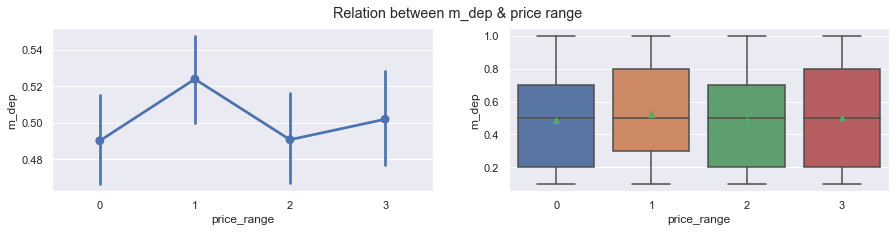

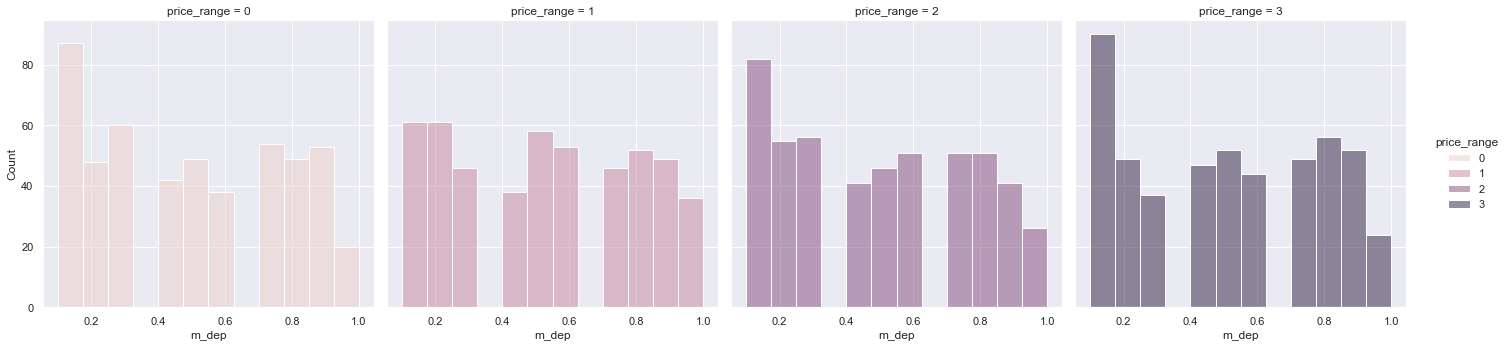

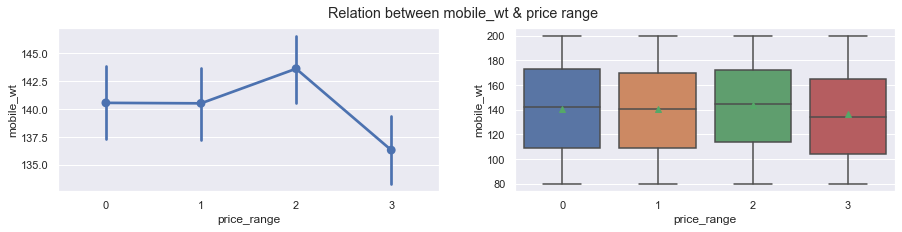

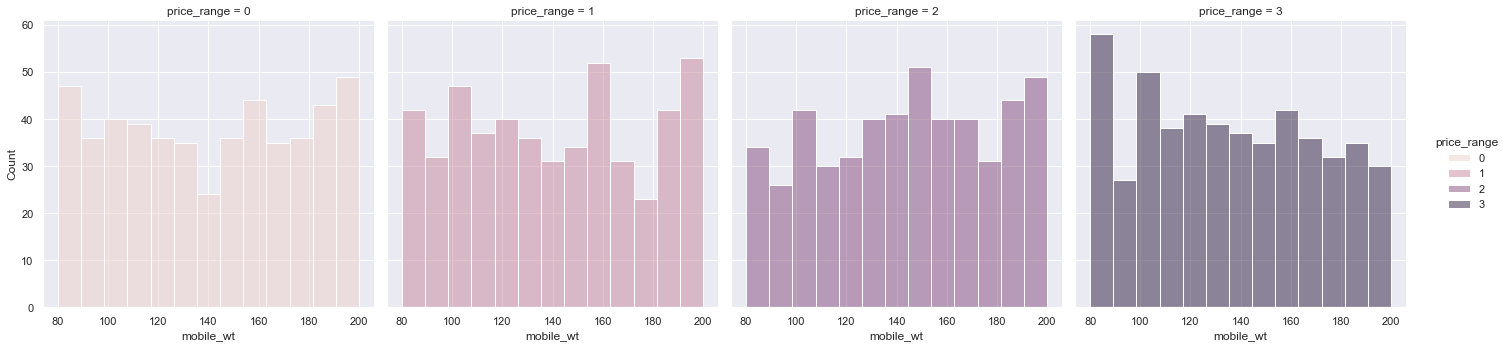

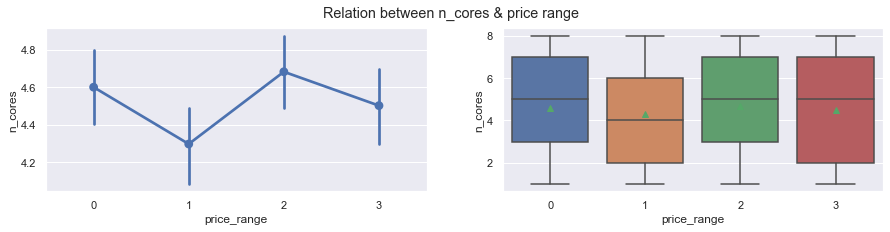

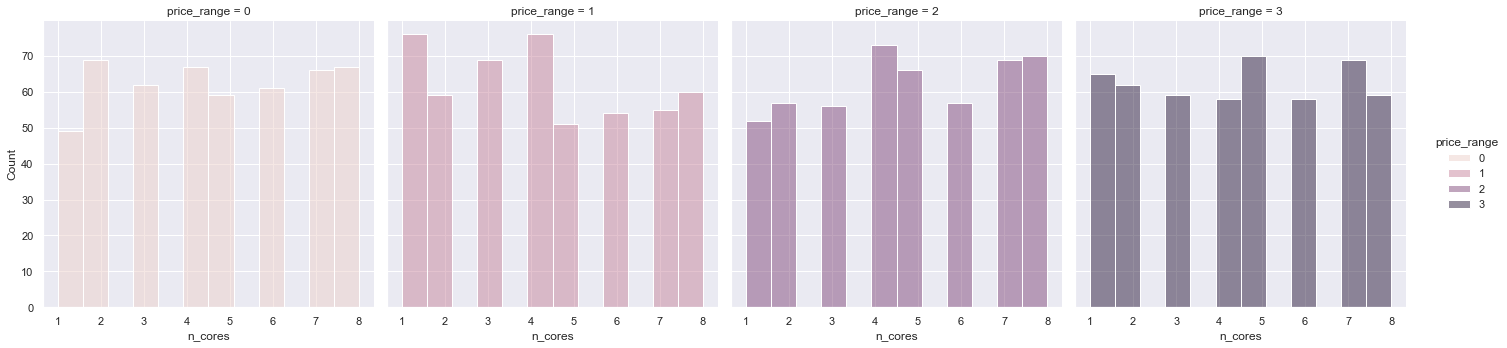

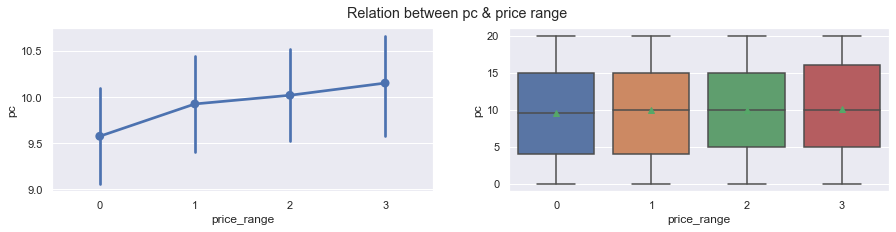

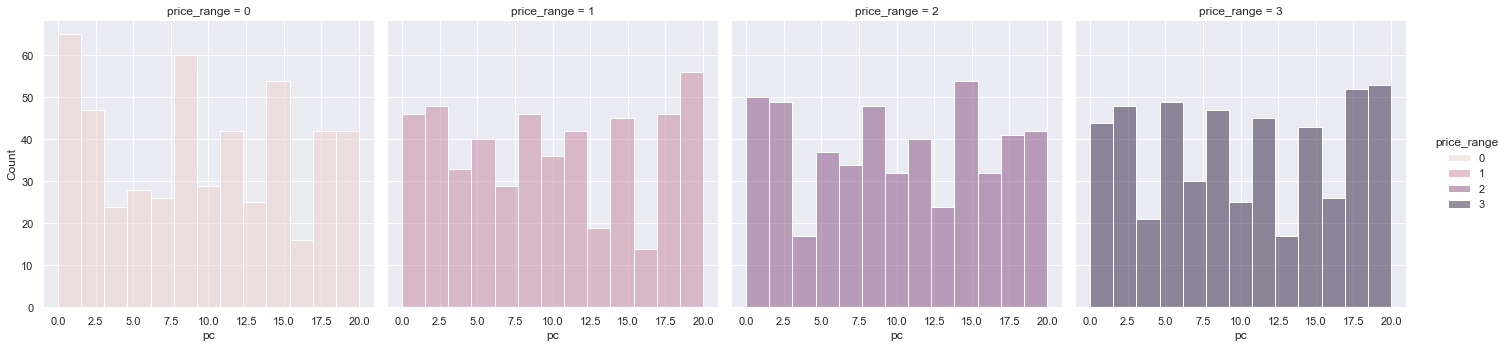

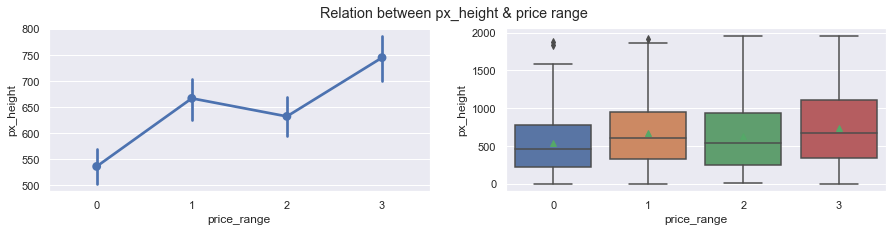

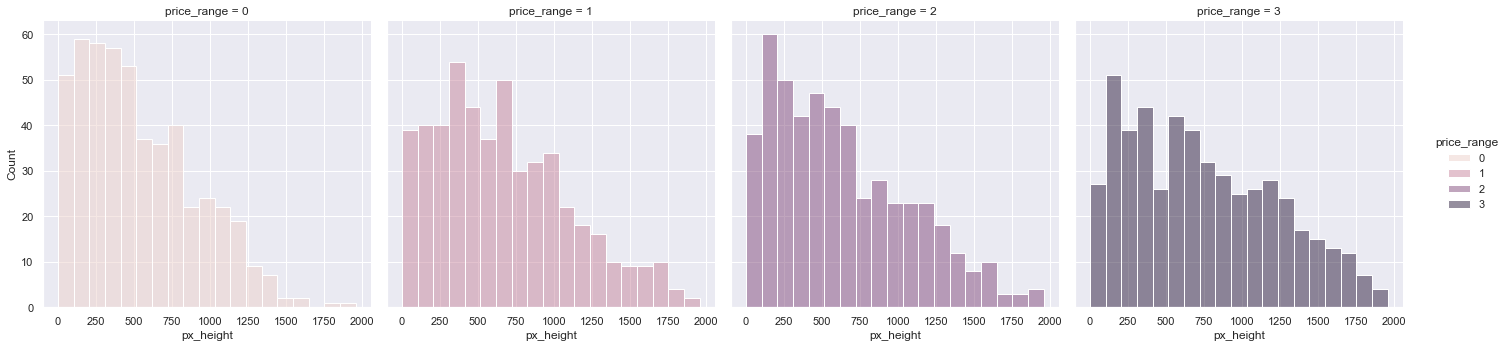

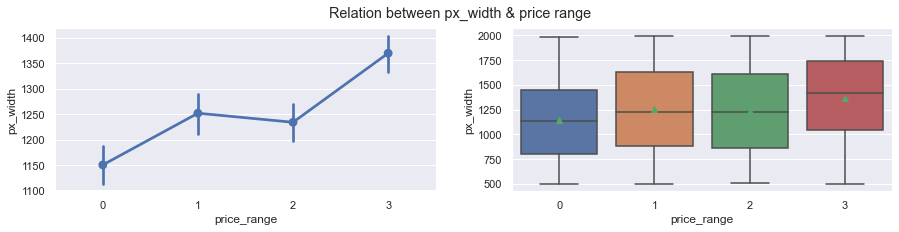

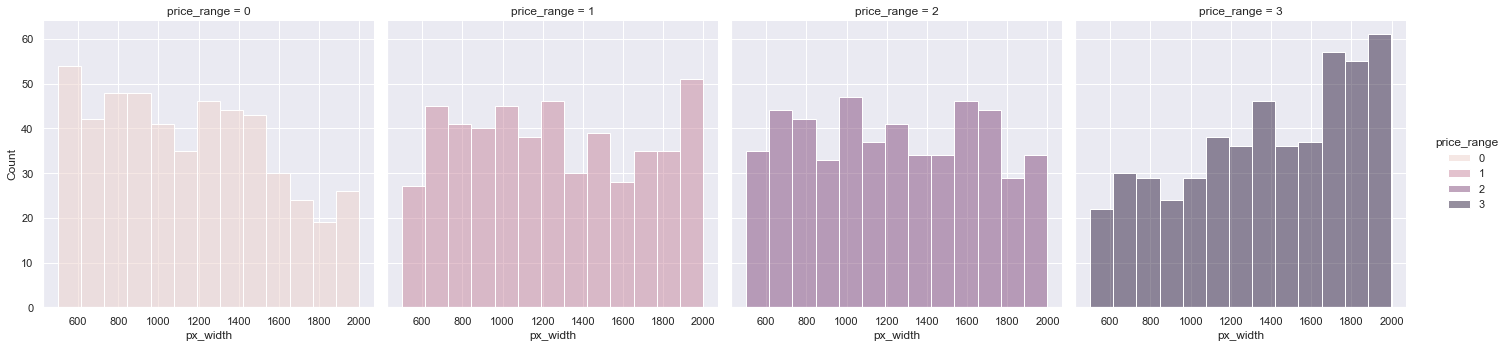

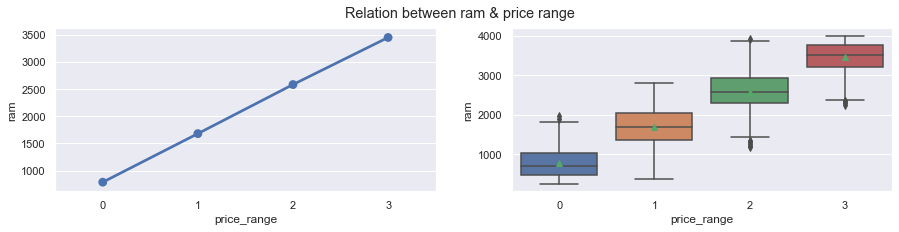

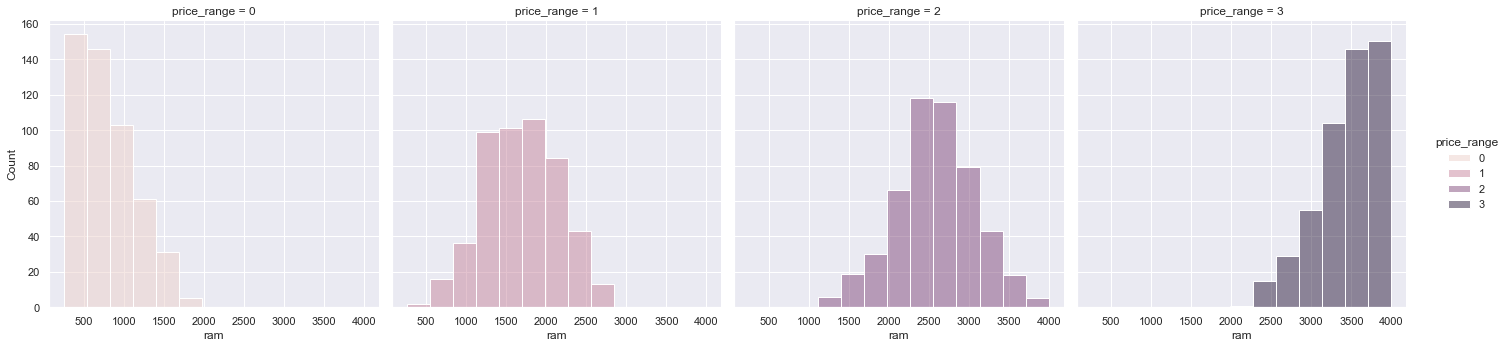

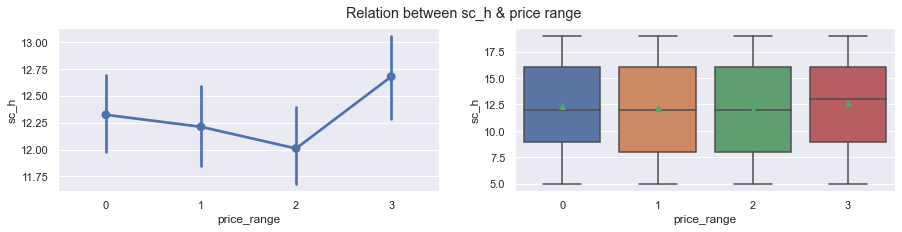

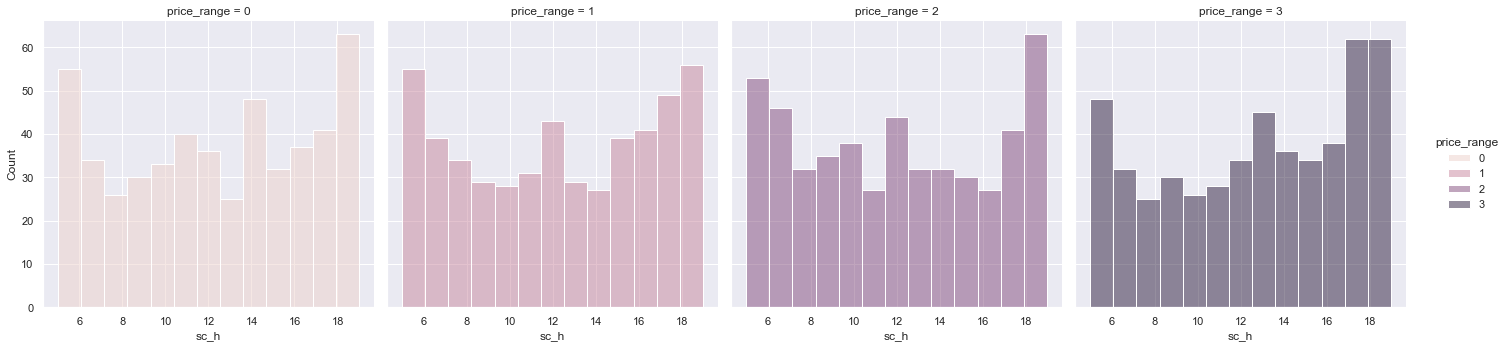

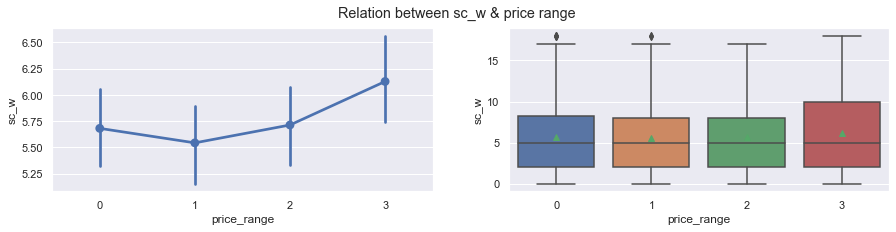

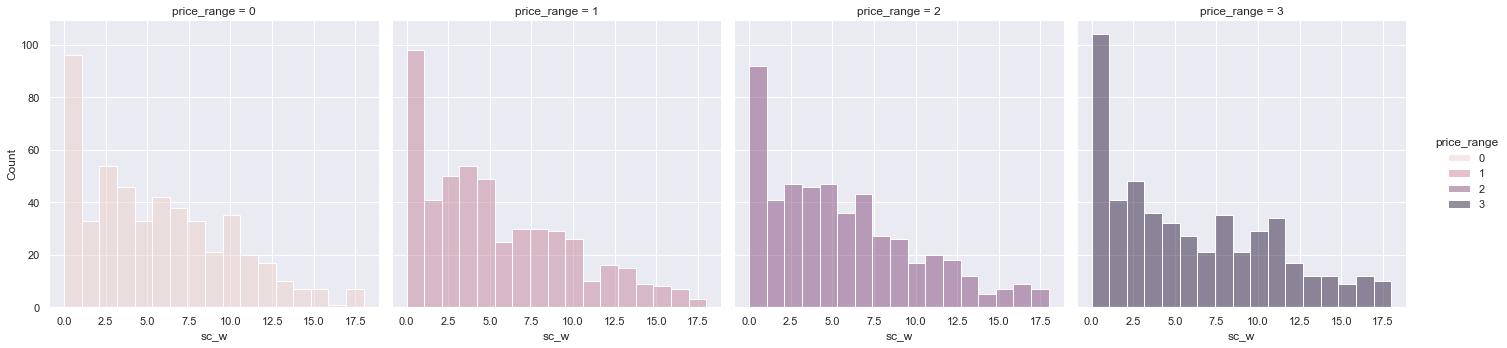

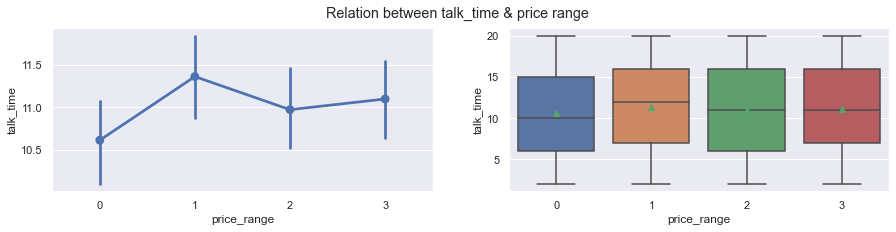

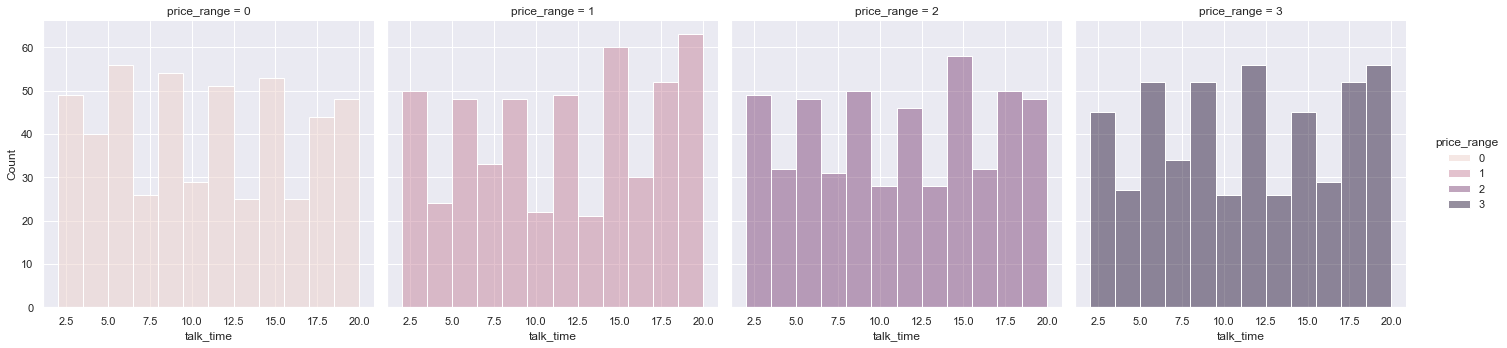

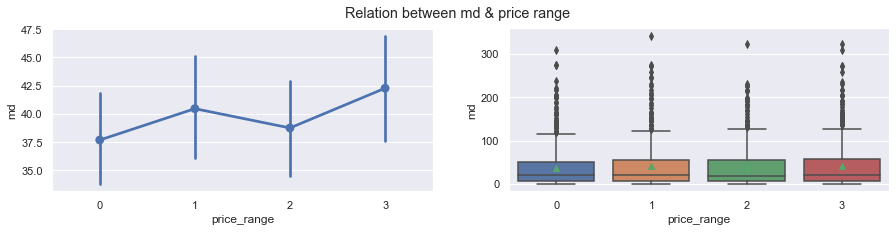

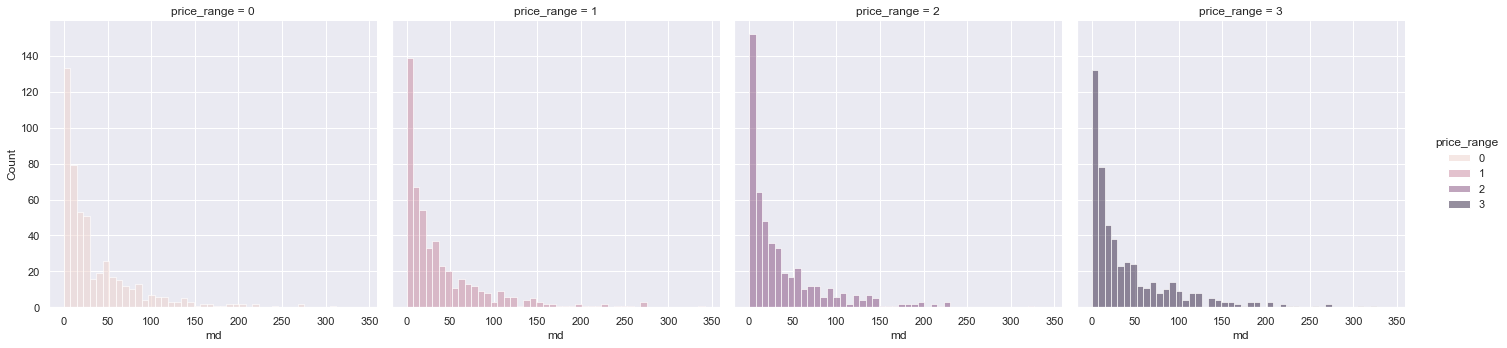

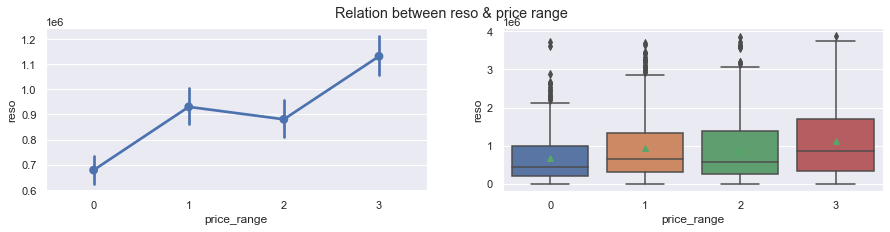

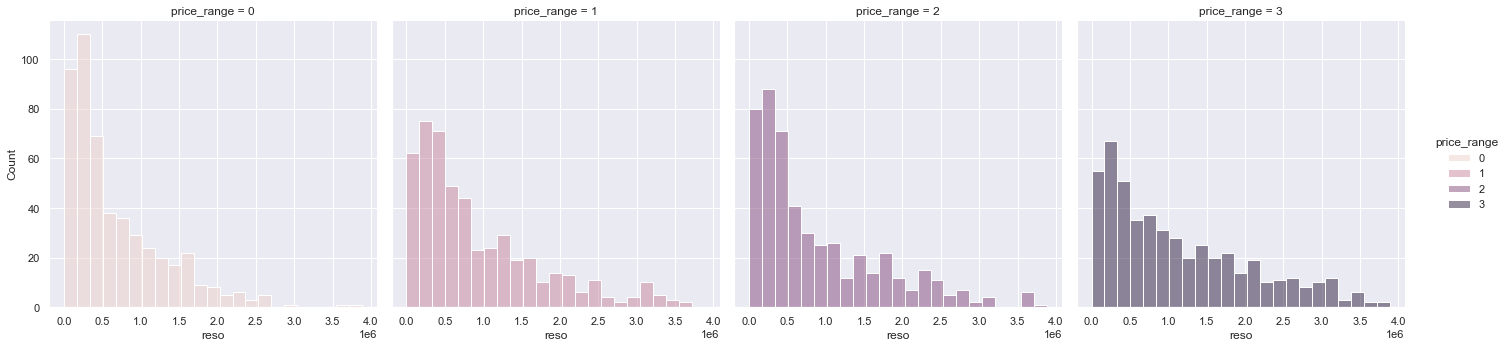

In [67]:
for col in df[ord_cat].columns.drop('price_range'):
    fig,axs = plt.subplots(1,2,figsize=(15,3),facecolor='w',edgecolor='k')
    sns.pointplot(data=df,y=col,x='price_range',ax=axs[0])
    sns.boxplot(data=df,y=col,x='price_range',ax=axs[1],showmeans=True)
    plt.suptitle(f'Relation between {col} & price range')
    sns.displot(data=df,x=col,hue='price_range',col='price_range')
    plt.show()

#### Findings:
<ol>
    
<li>battery_power:
    <ul>
        <li>price_range levels increases by increasing in battery power, price range 0 'low cost' has battery power about 1110 mAh while price_range 3 'very high cost' has battery power mean about 1390 mAh, However it seems that battery power has no effect between price_range 1 & 2 bettery power almost equal.</li>
        <li>price_range levels has almost same variation on the battery power.</li>
        <li>price_range has same battery power range with min 500 & max 2000 mAh, However price range 0 has 75% of battery power less than about 1450 mAh while the price range 3 has 75% of battery power less than 1750 mAh.</li>
       <li>battery_power has no outliers on all price_ranges levels.</li>
    </ul>
</li>
    
<li>clock_speed:
    <ul>
        <li>There is no clear relation between clock_speed & price_range,while price_range 0 has mean clock_speed 1.55 greater than 1.49 on price range 1 ; price range 1 has mean clock_speed 1.49 less than 1.54 on price_range 2 which is greater than 1.53 on price_range 3, we can see that the mean of clock_speed is up & down and not affect price_range levels .</li>
        <li>price_range levels has almost same variation on the clock_speed.</li>
        <li>price_range levels has equal clock_speed range with min 0.5 & max 3, also 75% of clock_speed on price_range level almsot equal about 2.3.</li>
       <li>However all price_range levels has 0.5 as a Top on clock_speed there are difference on the frequency of clock_speed instances that's affect the difference on clock_speed mean.</li>
       <li>clock_speed has no outliers on all price_ranges levels.</li>
    </ul>
</li>
    
<li>fc "front camera mega pixels":
    <ul>
        <li>there is little difference on fc mean on price levels, however it increases on first 3 levels it decreases on highest price level.</li>
        <li>price_range levels has almost same variation on the fc.</li>
        <li>price_range levels has equal fc range with min 0.0 & max 17.5,75% of fc on price_range level(1,2&3) almsot equal on about less than 6 which is little more than price_range level 0.</li>
       <li>However all price_range levels has 0.0 as a Top on fc there are difference on the frequency of fc instances that's affect the difference on fc mean.</li>
       <li>fc has outliers on all price_ranges levels.</li>
    </ul>
</li>
    
<li>int_memory 'internal memory in Gigabytes':
    <ul>
        <li>There is no clear relation between int_memory & price_range,while price_range 0 has mean int_memory about 30 goes up till about 32 on price range 1 it goes down again till about 31 on price_range 2 then again goes up till about 34 on price_range 3, we can see that the mean of int_memory is up & down without clear effect on price_range levels .</li>
        <li>price_range levels has almost same variation on the int_memory.</li>
        <li>price_range levels has equal int_memory range with min 2 & max 64, also 75% of int_memory on price_range level almsot equal about 48 with very little difference more or less.</li>
       <li>int_memory has no outliers on all price_ranges levels.</li>
    </ul>
</li>
    
<li>m_dep 'Mobile depth in cm':
    <ul>
          <li>as int_memory There is no clear relation between m_dep & price_range, we can see that the mean of m_dep is up & down without clear effect on price_range levels .</li>
        <li>price_range levels has almost same variation on the m_dep.</li>
        <li>price_range levels has equal m_dep range with min 0.1 & max 1; 75% of m_dep on price_range level(1,3) less than 0.8 little more than price level (0,2) almost less than 0.7.</li>
       <li>m_dep has no outliers on all price_ranges levels.</li>
    </ul>
</li>
<li>mobile_wt 'Mobile weight' :
    <ul>
        <li>There is no clear relation between mobile_wt & price_range, we can see that the mean of m_dep is up & down with no clear effect on price_range levels.</li>
        <li>price_range levels has almost same variation on the mobile_wt.</li>
        <li>price_range levels has equal mobile_wt range with min 80 & max 200; the 75% of mobile_wt on price_range levels almost less than 170 with avery little difference more or less than each other.</li>
       <li>mobile_wt has no outliers on all price_ranges levels.</li>
    </ul>
</li>
    
<li>n_cores:
    <ul>
        <li>price_range level 0 is a multimodal however n_core 2 is the top frequencies, price_range level 1 is a bimodal on n_core(1&4), we can say that price level 2 is a unimodal on n_core 4 while price level 3 is a bimodal on n_core (5&7).</li>
    </ul>
</li>
    
<li>pc 'primary_camera mega pixels':
    <ul>
         <li>we can see price level goes up with increasing on the mean of pc.</li>
        <li>price_range levels has almost same variation on the pc.</li>
        <li>price_range levels has equal pc range with min 0.0 & max 20,75% of pc on price_range level less than 15 except price level 3 75% has pc less than about 16 mega pixels.</li>
       <li>pc has no outliers on all price_ranges levels.</li>
    </ul>
</li>
    
<li>px_height:
    <ul>
        <li>we can see there are a huge difference on px_height mean and it price level increase with increasing on mean of px_height except on the middle price level px_height is decreased from level 1 to 2 may be du to the outliers on level 1 px_height.</li>
        <li>price_range levels has almost same variation on the px_height.</li>
        <li>price_range levels has equal px_height range with min 0.0 & max 1960,75% of px_height on price_range level 0 is less than about 750 while it's about less than 1100 on price level 3; however it's almost same on the two middle price level less than about 900.</li>
       <li>px_height has outliers on the first two price_ranges levels.</li>
    </ul>
</li>
    

<li>px_width:
    <ul>
         <li>we can see there are a huge difference on px_height mean and it price level increase with increasing on mean of px_width except on the middle price level px_width is decreased from level 1 to 2 may be du to the outliers on level 1 px_height.</li>
        <li>price_range levels has almost same variation on the px_width.</li>
        <li>price_range levels has equal px_width range with min 500 & max 1998,75% of px_height on price_range level 0 is less than about 1490 while it's about less than 1750 on price level 3; however it's almost same on the two middle price level less than about 1600.</li>
       <li>px_width has no outliers on all price_ranges levels.</li>
    </ul>
</li>
<li>ram:
    <ul>
         <li>clearly we can see a perfect relation between increasing on mean of ram with going up on price_range level & actually we can expected that from the positive linear correlation we found up +0.92.</li>
         <li>price levels goes up with increasing on ram range,75% of ram on price_range level 0 is less than about 1000 while it's about less than 3800 on price level 3.</li>
       <li>ram has outliers o price_ranges levels (0&2).</li>
    </ul>
</li>
<li>sc_h 'screen_height in cm':
    <ul>
        <li>sc_h mean decreased on the first 3 price level, However it increased on the highest price level 3.</li>
        <li>price_range levels has almost same variation on the sc_h.</li>
        <li>price_range levels has equal sc_h range with min 5 & max 19; 75% of sc_h on price_range level less than 15.5.</li>
       <li>sc_h has no outliers on all price_ranges levels.</li>
    </ul>
</li>
    
<li>sc_w 'Screen_width in cm':
    <ul>
        <li>sc_w mean decreased on the first 2 price level,However it increased on the latest 2 price level.</li>
        <li>price_range levels has almost same variation on the sc_w.</li>
        <li>price_range levels has equal sc_w range with min 0 & max 18; 75% of sc_w on price_range level less than 8 except on price level 3 is less than 10.</li>
       <li>sc_w has outliers on first two price_ranges levels.</li>
    </ul>
</li>
    
<li>talk_time:
    <ul>
        <li>There is no clear relation between talk_time & price_range, we can see that the mean of talk_time is up & down with no clear effect on price_range levels.</li>
        <li>price_range levels has almost same variation on the talk_time.</li>
        <li>price_range levels has equal talk_time range with min 2 & max 20; 75% of talk_time on price_range level less than 16.</li>
       <li>talk_time has no outliers price_ranges levels.</li>
    </ul>
</li>
<li>md 'mobile dimension m_d*sc_h*sc_w':
    <ul>
        <li>There is no clear relation between md & price_range, we can see that the mean of md is up & down with no clear effect on price_range levels.</li>
        <li>price_range levels has almost same md variation.</li>
        <li>price_range levels has equal md range.</li>
       <li>md has outliers price_ranges levels.</li>
    </ul>
</li>
<li>reso:
    <ul>
        <li>we can see there are a huge difference on reso mean, price level increased by increasing on mean of reso except on the middle price level reso is decreased from level 1 to 2 may be du to the outliers on level 1 px_height.</li>
        <li>price_range levels has almost same variation on the reso.</li>
        <li>px_height has outliers on price_ranges levels.</li>
    </ul>
</li>
</ol>
    

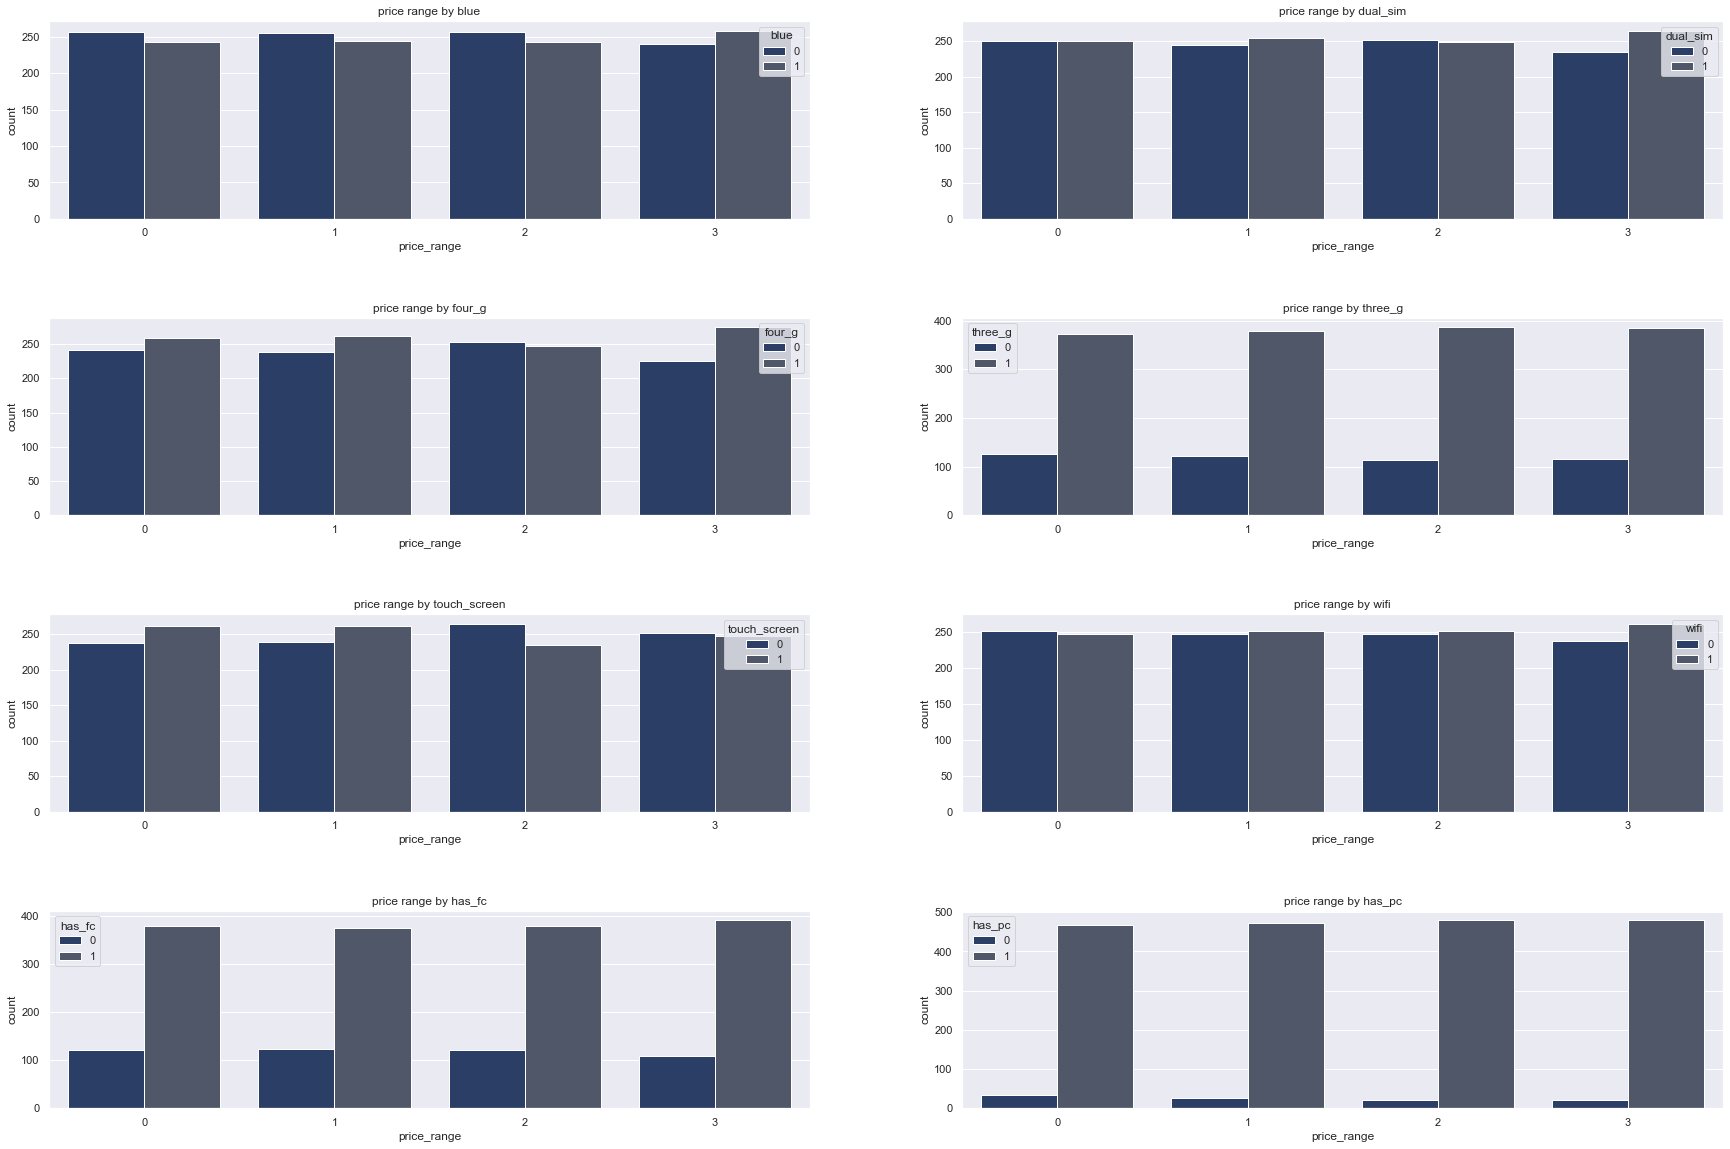

In [94]:
fig,axs = plt.subplots(4,2,figsize=(30,20),facecolor='w',edgecolor='k')
fig.subplots_adjust(hspace=0.5, wspace=0.2)
sns.set_theme(palette='cividis')
axs=axs.ravel()
for i,col in enumerate(df[nom_cat].columns):
    sns.countplot(data=df,x='price_range',hue=col,ax=axs[i])
    axs[i].set_title(f'price range by {col}')
# fig.tight_layout()
# plt.legend(bbox_to_anchor=(3,0),loc='lower right',ncol=1)